<a href="https://colab.research.google.com/github/fmarcelneves/HR-Analytics-Prediction/blob/main/IBM_HR_Analytics_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The problem
Employees are the backbone of any organization. Its performance is heavily based on the quality of the employees and the hability of retaining them. Regarding this issue, employee attrition is a gradual but deliberate reduction in the number of employees in a company or business organization. Employee atrrition generates a costly process to replace the workforce and the possible loss of talented and trained people. Thus, what are the reasons why an employee quits?

A survey made by Better works (https://blog.betterworks.com/people-analytics-reveals-top-reasons-for-attrition-and-it-isnt-compensation/) show a number of reasons (< 50%) of why employee quits, these are:

* Management (81%)
* Alignment and involvement (73%)
* Employee enablement (69%)
* Collaboration and teamwork (65%)
* Feedback and recognition (62%)
* Investment in people (57%)
* Compensation and benefits (53%)
<br><br>
In this notebook, we will focus on theses issues too prove the relationship between relation with the boss, bored and unchallenged, relationships with coworkers, salary, overtime and employee attrition.
<br><br>
Here we used the IBM's HR focused dataset of employee attrition and performance



# Objectives 
Our objetive is to predict turnover and find differences between the group that stayed or that left, especially comparing the most common reasosn of why employee quits (as listed above)


## Data definitions 
Below are some definitions for better understanding of the data: 
<br><br>
Education   
* 1 Below College
* 2 College
* 3 Bachelor
* 4 Master
* 5 Doctor

Environment Satisfaction, Job Involvement, Job Satisfaction & Relationship Satisfaction
* 1 Low
* 2 Medium
* 3 High
* 4 Very High

Performance Rating
* 1 Low
* 2 Good
* 3 Excellent
* 4 Outstanding

Work-Life Balance
* 1 Bad
* 2 Good
* 3 Better
* 4 Best
<br><br>

Meaning of some data categories: 

Daily rate = the amount of money you are paid per day.

Percent salary hike = the % change in salary from 2016 vs 2015.

Relationship satisfaction = how happy is the employee with her colleagues.

Stock option level = how much company stocks you own.

# Import packages 

In [2]:
%%capture
#import all required libraries
#Data Analysis
import pandas as pd
import numpy as np
#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
!pip install plotly --upgrade
import plotly.express as px
#from plotly.subplots import make_subplots
import plotly.graph_objs as go
!pip install scikit-plot
#import plotly.figure_factory as ff
#from plotly import tools
#import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.io as pio
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
pio.templates.default = "plotly_white"
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
# machine learning 
from imblearn.pipeline import Pipeline
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
import xgboost as xgb

In [3]:
from imblearn.pipeline import make_pipeline

In [4]:
Pipeline

imblearn.pipeline.Pipeline

In [5]:
make_pipeline

<function imblearn.pipeline.make_pipeline>

#  Data acquisition, basic description and initial exploration 

In [6]:
%%capture
!wget https://github.com/IBM/employee-attrition-aif360/raw/master/data/emp_attrition.csv --output-document=emp_attrition.csv

In [7]:
#You have to include the full link to the csv file containing your dataset
HR = pd.read_csv('emp_attrition.csv')

In [8]:
HR.head(5)

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes  ...                       0                     5
1   49        No  ...                       1                     7
2   37       Yes  ...                       0                     0
3   33        No  ...                       3                     0
4   27        No  ...                       2                     2

[5 rows x 35 columns]

In [9]:
# 35 features in total, each contains 1470 data points
HR.shape

(1470, 35)

In [10]:
#basic describition of the data
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
#the dataset does not have null values
HR.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
HR.describe().T

count          mean  ...       75%      max
Age                       1470.0     36.923810  ...     43.00     60.0
DailyRate                 1470.0    802.485714  ...   1157.00   1499.0
DistanceFromHome          1470.0      9.192517  ...     14.00     29.0
Education                 1470.0      2.912925  ...      4.00      5.0
EmployeeCount             1470.0      1.000000  ...      1.00      1.0
EmployeeNumber            1470.0   1024.865306  ...   1555.75   2068.0
EnvironmentSatisfaction   1470.0      2.721769  ...      4.00      4.0
HourlyRate                1470.0     65.891156  ...     83.75    100.0
JobInvolvement            1470.0      2.729932  ...      3.00      4.0
JobLevel                  1470.0      2.063946  ...      3.00      5.0
JobSatisfaction           1470.0      2.728571  ...      4.00      4.0
MonthlyIncome             1470.0   6502.931293  ...   8379.00  19999.0
MonthlyRate               1470.0  14313.103401  ...  20461.50  26999.0
NumCompaniesWorked        1470.0      2.693197  ...      4.00      9.0
PercentSalaryHike         1470.0     15.209524  ...     18.00     25.0
PerformanceRating         1470.0      3.153741  ...      3.00      4.0
RelationshipSatisfaction  1470.0      2.712245  ...      4.00      4.0
StandardHours             1470.0     80.000000  ...     80.00     80.0
StockOptionLevel          1470.0      0.793878  ...      1.00      3.0
TotalWorkingYears         1470.0     11.279592  ...     15.00     40.0
TrainingTimesLastYear     1470.0      2.799320  ...      3.00      6.0
WorkLifeBalance           1470.0      2.761224  ...      3.00      4.0
YearsAtCompany            1470.0      7.008163  ...      9.00     40.0
YearsInCurrentRole        1470.0      4.229252  ...      7.00     18.0
YearsSinceLastPromotion   1470.0      2.187755  ...      3.00     15.0
YearsWithCurrManager      1470.0      4.123129  ...      7.00     17.0

[26 rows x 8 columns]

In [13]:
# Let's replace the columns 'Attrition' , 'overtime' and 'Over18' with integers before performing any visualizations 
HR['Attrition'] = HR['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
HR['OverTime'] = HR['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
HR['Over18'] = HR['Over18'].apply(lambda x:1 if x == 'Y' else 0)

# Exploratory data analysis 

In [14]:
#current dataset 
HR.head()

Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41          1  ...                       0                     5
1   49          0  ...                       1                     7
2   37          1  ...                       0                     0
3   33          0  ...                       3                     0
4   27          0  ...                       2                     2

[5 rows x 35 columns]

In [15]:
#pd.options.plotting.backend = "matplotlib"

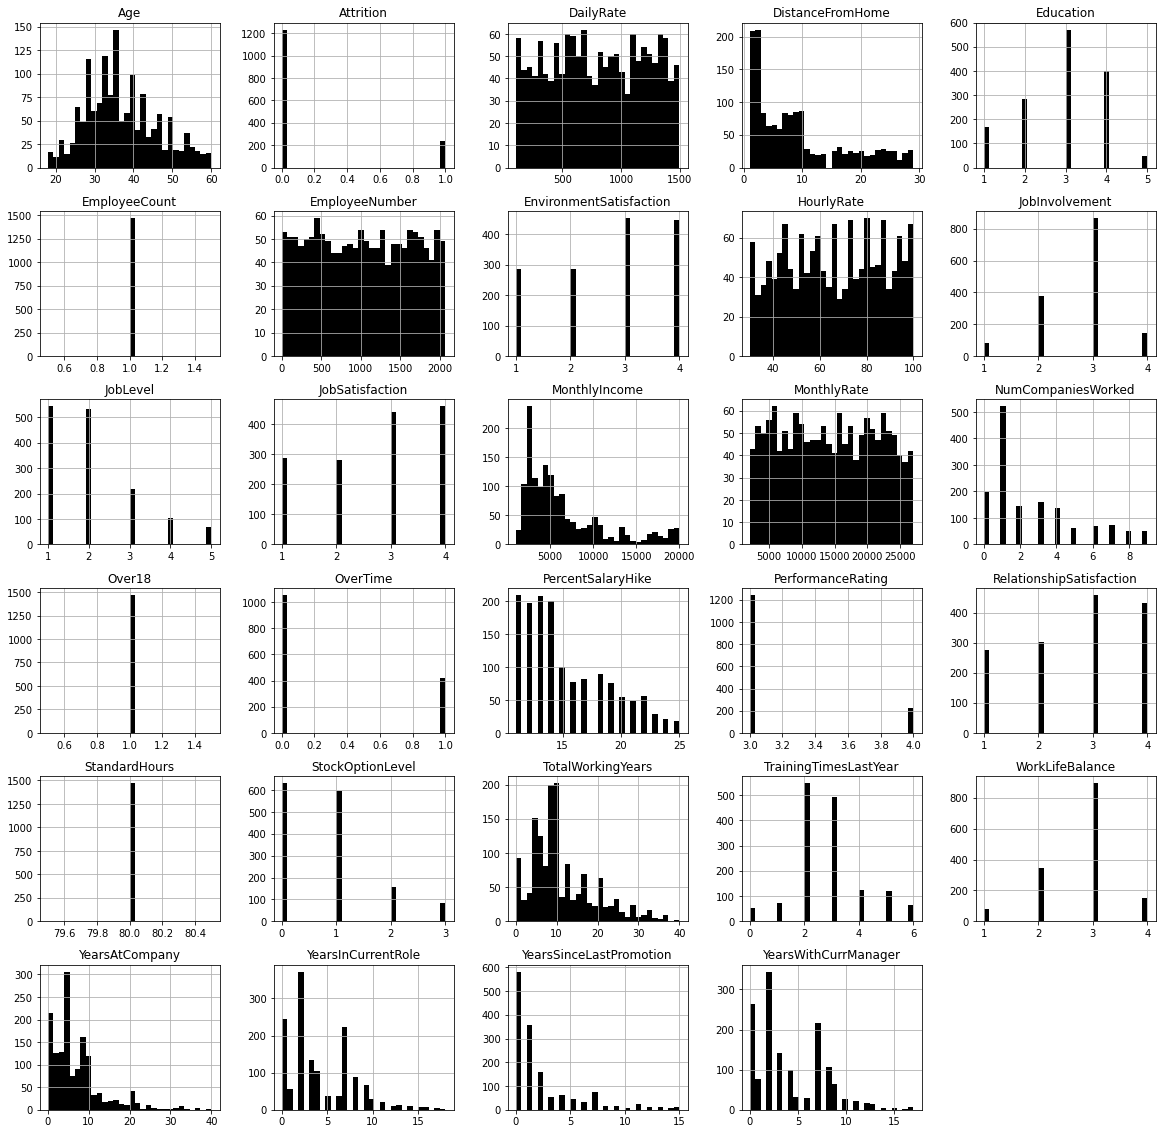

In [16]:
#Histograms of the data 
HR.hist(bins=30, figsize=(20, 20), color = 'black');
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other

 It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other

In [17]:
# Let's drop 'EmployeeNumber' as well
HR.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace=True)

In [18]:
# Let's see how many employees left the company 
left_df = HR[HR['Attrition'] == 1]
stayed_df = HR[HR['Attrition']== 0] 

In [19]:
values = [20, 30]

In [20]:
def newLegend(fig, newNames):
    newLabels = []
    for item in newNames:
        for i, elem in enumerate(fig.data[0].labels):
            if elem == item:
                #fig.data[0].labels[i] = newNames[item]
                newLabels.append(newNames[item])
    fig.data[0].labels = np.array(newLabels)
    return(fig)

In [21]:
fig = px.histogram(HR, x="Attrition", title="Attrition", color = HR['Attrition'], barmode='group')
#fig=newLegend(fig, {0:"0 - No", 1:"1 - Yes"})
fig.show()

In [22]:
print('Number of employess who stayed =', len(stayed_df))
print('% of employess who stayed =',1.* len(stayed_df)/len(HR) * 100, '%')

Number of employess who stayed = 1233
% of employess who stayed = 83.87755102040816 %


In [23]:
# Count the number of employees who stayed and left
# It is an imbalanced dataset 
print('Number of employess who left =', len(left_df))
print('% of employess who left =',1.* len(left_df)/len(HR) * 100, '%')

Number of employess who left = 237
% of employess who left = 16.122448979591837 %


In [24]:
stayed_df.describe().T

count          mean  ...      75%      max
Age                       1233.0     37.561233  ...     43.0     60.0
Attrition                 1233.0      0.000000  ...      0.0      0.0
DailyRate                 1233.0    812.504461  ...   1176.0   1499.0
DistanceFromHome          1233.0      8.915653  ...     13.0     29.0
Education                 1233.0      2.927007  ...      4.0      5.0
EnvironmentSatisfaction   1233.0      2.771290  ...      4.0      4.0
HourlyRate                1233.0     65.952149  ...     83.0    100.0
JobInvolvement            1233.0      2.770479  ...      3.0      4.0
JobLevel                  1233.0      2.145985  ...      3.0      5.0
JobSatisfaction           1233.0      2.778589  ...      4.0      4.0
MonthlyIncome             1233.0   6832.739659  ...   8834.0  19999.0
MonthlyRate               1233.0  14265.779400  ...  20364.0  26997.0
NumCompaniesWorked        1233.0      2.645580  ...      4.0      9.0
OverTime                  1233.0      0.234388  ...      0.0      1.0
PercentSalaryHike         1233.0     15.231144  ...     18.0     25.0
PerformanceRating         1233.0      3.153285  ...      3.0      4.0
RelationshipSatisfaction  1233.0      2.733982  ...      4.0      4.0
StockOptionLevel          1233.0      0.845093  ...      1.0      3.0
TotalWorkingYears         1233.0     11.862936  ...     16.0     38.0
TrainingTimesLastYear     1233.0      2.832928  ...      3.0      6.0
WorkLifeBalance           1233.0      2.781022  ...      3.0      4.0
YearsAtCompany            1233.0      7.369019  ...     10.0     37.0
YearsInCurrentRole        1233.0      4.484185  ...      7.0     18.0
YearsSinceLastPromotion   1233.0      2.234388  ...      3.0     15.0
YearsWithCurrManager      1233.0      4.367397  ...      7.0     17.0

[25 rows x 8 columns]

In [25]:
left_df.describe().T
#  Let's compare the mean and std of the employees who stayed and left 
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home 
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

count          mean  ...      75%      max
Age                       237.0     33.607595  ...     39.0     58.0
Attrition                 237.0      1.000000  ...      1.0      1.0
DailyRate                 237.0    750.362869  ...   1092.0   1496.0
DistanceFromHome          237.0     10.632911  ...     17.0     29.0
Education                 237.0      2.839662  ...      4.0      5.0
EnvironmentSatisfaction   237.0      2.464135  ...      4.0      4.0
HourlyRate                237.0     65.573840  ...     84.0    100.0
JobInvolvement            237.0      2.518987  ...      3.0      4.0
JobLevel                  237.0      1.637131  ...      2.0      5.0
JobSatisfaction           237.0      2.468354  ...      3.0      4.0
MonthlyIncome             237.0   4787.092827  ...   5916.0  19859.0
MonthlyRate               237.0  14559.308017  ...  21081.0  26999.0
NumCompaniesWorked        237.0      2.940928  ...      5.0      9.0
OverTime                  237.0      0.535865  ...      1.0      1.0
PercentSalaryHike         237.0     15.097046  ...     17.0     25.0
PerformanceRating         237.0      3.156118  ...      3.0      4.0
RelationshipSatisfaction  237.0      2.599156  ...      4.0      4.0
StockOptionLevel          237.0      0.527426  ...      1.0      3.0
TotalWorkingYears         237.0      8.244726  ...     10.0     40.0
TrainingTimesLastYear     237.0      2.624473  ...      3.0      6.0
WorkLifeBalance           237.0      2.658228  ...      3.0      4.0
YearsAtCompany            237.0      5.130802  ...      7.0     40.0
YearsInCurrentRole        237.0      2.902954  ...      4.0     15.0
YearsSinceLastPromotion   237.0      1.945148  ...      2.0     15.0
YearsWithCurrManager      237.0      2.852321  ...      5.0     14.0

[25 rows x 8 columns]

In [26]:
HR.corr

<bound method DataFrame.corr of       Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41          1  ...                       0                     5
1      49          0  ...                       1                     7
2      37          1  ...                       0                     0
3      33          0  ...                       3                     0
4      27          0  ...                       2                     2
...   ...        ...  ...                     ...                   ...
1465   36          0  ...                       0                     3
1466   39          0  ...                       1                     7
1467   27          0  ...                       0                     3
1468   49          0  ...                       0                     8
1469   34          0  ...                       1                     2

[1470 rows x 31 columns]>

In [27]:
correlations = HR.corr(method= 'spearman')
fig = px.imshow(correlations, labels=dict(color="Correlation"), title="Correlation between numerical variables")
fig.update_layout(width=700, height=700)
fig.show()
# Job level is strongly correlated with monthly income and total working years 
# Year in current role is strongly correlated with years at company and years with current manager

A short analysis reveals the following key points:

---

For people who leave the company (on average):

* They are younger: 33 years
* They live further from their work: 11km
* Less satisfaction with the work environment: 2 (Medium) 
* Lower level of work: 1 ()
* Less satisfaction with work: 2 (Medium)
* Lower monthly salary: $ 4800.00
* Work more overtime: 0.5
* Less years in the company: 5
* Fewer years in current position: 2
* Fewer years with current manager: 2.8

## 1.1 Relationship with the Boss (Management)

In [28]:
fig = px.box(HR, x="YearsWithCurrManager", color="Attrition", labels={'YearsWithCurrManager': 'Years with the Current Manager'}, 
             title='Boxplots of people spending years with a Manager in an Organization')
fig.show()

In [29]:
HR_man_count=HR.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['YearsWithCurrManager'].count()).reset_index(name='Counts')
fig = px.line(HR_man_count,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of people spending years with a Manager in an Organization',
              labels={'YearsWithCurrManager': 'Years with the Current Manager'}, color_discrete_sequence=["red", "blue"])
fig.update_layout(legend_traceorder="reversed")
fig.show()

## 1.2 Alignment and Involvement

In [30]:
fig= px.histogram(HR, x="JobInvolvement", title="Atrittion vs Job Involvement", color=HR['Attrition'], barmode='group', histnorm='percent', labels={'JobInvolvement': 'Job Involvement'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4],
        ticktext = ['Low', 'Medium', 'High', 'Very High']
        )
)
fig.show()

In [31]:
fig= px.histogram(HR, x="JobSatisfaction", title= "Atrittion vs Job Satisfaction", color=HR['Attrition'], barmode='group', histnorm='percent', 
                  labels={'JobSatisfaction': 'Job Satisfaction'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4],
        ticktext = ['Low', 'Medium', 'High', 'Very High']
        )
)
fig.show()

In [32]:
fig= px.histogram(HR, x="PerformanceRating", title="Atrittion vs Performance Rating", color=HR['Attrition'], barmode='group', histnorm='percent',
                  labels={'PerformanceRating': 'Performance Rating'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [3, 4],
        ticktext = ['Excellent', 'Outstanding']
        )
)
fig.show()

In [33]:
fig= px.histogram(HR, x="JobLevel", title= "Atrittion vs Job Level", color=HR['Attrition'], marginal="box", barmode='group',  histnorm='percent', 
                  labels={'JobLevel': 'Job Level'})
fig.show()

In [34]:
HR_years_count=HR.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['YearsInCurrentRole'].count()).reset_index(name='Counts')
fig = px.line(HR_years_count,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Count of years in current role',
              labels={'YearsInCurrentRole': 'Years In Current Role'}, color_discrete_sequence=["red", "blue"])
fig.update_layout(legend_traceorder="reversed")
fig.show()

In [35]:
px.treemap(HR, path=["JobRole"], color='Attrition', color_continuous_scale="Bluered_r")

## 1.3 Employee enablement, investment and recognition

In [36]:
fig= px.histogram(HR, x="WorkLifeBalance", title="Atrittion vs Work-Life Balance", color=HR['Attrition'], barmode='group', histnorm='percent',
                  labels={'WorkLifeBalance': 'Work Life Balance'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4],
        ticktext = ['Bad', 'Good', 'Better', 'Best']
        )
)
fig.show()

* Management (81%)
* Alignment and involvement (73%)
* Employee enablement (69%)
* Collaboration and teamwork (65%)
* Feedback and recognition (62%)
* Investment in people (57%)
* Compensation and benefits (53%)

In [37]:
fig= px.histogram(HR, x="TrainingTimesLastYear", title= "Atrittion vs Training Times Last Year", color=HR['Attrition'], barmode='relative', 
                   histnorm= 'percent', labels={'TrainingTimesLastYear': 'Training Times Last Year'})
fig.show()

In [38]:
HR_man_count=HR.groupby(['YearsSinceLastPromotion','Attrition']).apply(lambda x:x['YearsSinceLastPromotion'].count()).reset_index(name='Counts')
fig = px.line(HR_man_count,x='YearsSinceLastPromotion',y='Counts',color='Attrition',title='Count of years since last promotion',
              labels={'YearsSinceLastPromotion': 'Years Since Last Promotion'}, color_discrete_sequence=["red", "blue"])
fig.update_layout(legend_traceorder="reversed")
fig.show()

In [39]:
fig = px.box(HR,x='YearsSinceLastPromotion',color='Attrition',title='Boxplots of Years Since Last Promotion',
              labels={'YearsSinceLastPromotion': 'Years Since Last Promotion'})
fig.show()

In [40]:
HR.head()

Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41          1  ...                       0                     5
1   49          0  ...                       1                     7
2   37          1  ...                       0                     0
3   33          0  ...                       3                     0
4   27          0  ...                       2                     2

[5 rows x 31 columns]

In [41]:
job_overtime = HR.groupby(["OverTime", "Attrition"]).agg(count_col=pd.NamedAgg(column="Attrition", aggfunc="count")).reset_index()
fig = px.histogram(job_overtime, x="OverTime", y = 'count_col' ,color="Attrition",  histnorm='percent', color_discrete_sequence=["red", "blue"])
fig.update_layout(barmode='group', legend_traceorder="reversed",
                 xaxis = dict(
        tickmode = 'array',
        tickvals = [0,  1],
        ticktext = ['No', 'Yes']
        ) 
)
fig.show()

In [42]:
HR.head()

Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41          1  ...                       0                     5
1   49          0  ...                       1                     7
2   37          1  ...                       0                     0
3   33          0  ...                       3                     0
4   27          0  ...                       2                     2

[5 rows x 31 columns]

## 1.4 Collaboration and teamwork

In [43]:
fig= px.histogram(HR, x="RelationshipSatisfaction", title= "Atrittion vs Relationship Satisfaction", color=HR['Attrition'], histnorm='percent', barmode='group', 
                  labels={'RelationshipSatisfaction': 'Relationship Satisfaction'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4],
        ticktext = ['Low', 'Medium', 'High', 'Very High']
        )
)
fig.show()

In [44]:
env_satis=HR.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['EnvironmentSatisfaction'].count()).reset_index(name='Counts')
fig = px.area(env_satis,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Environment Satisfaction level of the People in the Organization', labels={'EnvironmentSatisfaction': 'Environment Satisfaction'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4],
        ticktext = ['Low', 'Medium', 'High', 'Very High']
        )
)
fig.show()


## 1.5 Compensation and benefits

In [45]:
fig = px.box(HR, x = 'Attrition', y = 'MonthlyIncome', color = 'Attrition', labels={'MonthlyIncome': 'Monthly Income'})
fig.update_layout(title = 'Monthly income')
fig.show()

In [46]:
fig= px.box(HR, x="MonthlyIncome", y='JobRole', title="Job Role vs Monthly Income", color='Attrition', labels={'MonthlyIncome': 'Monthly Income'})
fig.show()

In [47]:
hike_att=HR.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organization', 
        labels={'PercentSalaryHike': 'Percent Salary Hike'})

## 1.6 Personal factors

In [48]:
fig=px.histogram(HR, x= 'Age', title="Atrittion vs Age", color = HR['Attrition'], marginal="box")
fig.show() 

In [49]:
fig= px.box(HR, x="MonthlyIncome", y='JobRole', title="Job Role vs Monthly Income", color=HR['Gender'], labels={'JobRole': 'Job Role', 'MonthlyIncome': 'Monthly Income'})
fig.show()

In [50]:
fig= px.histogram(HR, x="MaritalStatus", title="Atrittion vs Marital Status", color=HR['Attrition'], barmode='group', labels= {'MaritalStatus': 'Marital Status'})
fig.show()

In [51]:
fig= px.histogram(HR, x="Gender", title="Atrittion vs Gender", color=HR['Attrition'], barmode='group')
fig.show()

In [52]:
fig= px.histogram(HR, x="Age", title="Atrittion vs Age", color=HR['Attrition'], marginal='box')
fig.show()

In [53]:
fig= px.histogram(HR, x="TotalWorkingYears", title="Atrittion vs Total Working Years", color=HR['Attrition'], marginal='box', labels= {'TotalWorkingYears': 'Total Working Years'})
fig.show()

In [54]:
fig = px.box(HR,x='DistanceFromHome',color='Attrition',title='Boxplots of Distance From Home',
              labels={'DistanceFromHome': 'Distance From Home'})
fig.show()

In [55]:
fig = px.parallel_categories(HR, dimensions= ['EducationField', 'JobRole', 'Attrition'],  color=HR['Education'])
fig.show()

# Data cleaning, final feature selection and preparation for the model

In [56]:
HR.head(3)

Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41          1  ...                       0                     5
1   49          0  ...                       1                     7
2   37          1  ...                       0                     0

[3 rows x 31 columns]

In [57]:
# Job level is strongly correlated with monthly income and total working years, thus it was dropped.  
#X_categorical and ordinal with not too much values/definition
X_cat = HR[['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']]
X_cat.head()

BusinessTravel  ... WorkLifeBalance
0      Travel_Rarely  ...               1
1  Travel_Frequently  ...               3
2      Travel_Rarely  ...               3
3  Travel_Frequently  ...               3
4      Travel_Rarely  ...               3

[5 rows x 12 columns]

In [58]:
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [59]:
X_cat.shape

(1470, 51)

In [60]:
X_cat = pd.DataFrame(X_cat)

About DailyRate, HourlyRate and MonthlyRate
<br><br>
* From Sunix Liu (Kaggle User): Monthly rate is the internal charge out rate which will be used to calculate the cost of each employee monthly, in general, the monthly rate will cover salary, social insurance, administration, logistics, over head etc.
HourlyRate and DailyRate. These are not considered because the Standart Hours for every employee are 80 hours.
* I decided to drop these three variables and keep only with "MonthlyIncome" that is the total salary.

In [61]:
#I turned gender categorical into numeric bynary 
HR['Gender'] = HR['Gender'].replace({'Female':0,'Male': 1})

In [62]:
# Years at company is strongly correlated with monthly income and total working years, thus it was dropped.
X_numerical = HR[['Age', 'Gender', 'DailyRate', 'DistanceFromHome',	'MonthlyIncome',	'NumCompaniesWorked',	'PercentSalaryHike',	'TotalWorkingYears','TrainingTimesLastYear', 'StockOptionLevel', 'OverTime','YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

Age  Gender  ...  YearsSinceLastPromotion  YearsWithCurrManager
0      41       0  ...                        0                     5
1      49       1  ...                        1                     7
2      37       1  ...                        0                     0
3      33       0  ...                        3                     0
4      27       1  ...                        2                     2
...   ...     ...  ...                      ...                   ...
1465   36       1  ...                        0                     3
1466   39       1  ...                        1                     7
1467   27       1  ...                        0                     3
1468   49       1  ...                        0                     8
1469   34       1  ...                        1                     2

[1470 rows x 14 columns]

In [63]:
X = pd.concat([X_numerical, X_cat], axis = 1)
X.head()

Age  Gender  DailyRate  DistanceFromHome  ...   47   48   49   50
0   41       0       1102                 1  ...  1.0  0.0  0.0  0.0
1   49       1        279                 8  ...  0.0  0.0  1.0  0.0
2   37       1       1373                 2  ...  0.0  0.0  1.0  0.0
3   33       0       1392                 3  ...  0.0  0.0  1.0  0.0
4   27       1        591                 2  ...  0.0  0.0  1.0  0.0

[5 rows x 65 columns]

In [64]:
y = HR['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [65]:
X.shape

(1470, 65)

StratifiedKFold 

In [66]:
SKF= StratifiedKFold(n_splits=5, shuffle=True, random_state= 42)

# Machine learning models 

## Random Forest

In [67]:
RF_pipe = Pipeline([     
 ('norm', StandardScaler()),  
 ('pca', PCA(n_components=53)),
 ('clf', RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1))
])

In [68]:
predictions_RF = cross_val_predict(RF_pipe, X, y, cv = SKF)

In [69]:
print(classification_report(y, predictions_RF))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1233
           1       0.83      0.02      0.04       237

    accuracy                           0.84      1470
   macro avg       0.84      0.51      0.48      1470
weighted avg       0.84      0.84      0.77      1470



## Logistic regression

In [70]:
from sklearn.decomposition import PCA

In [71]:
LR_pipe = Pipeline([ 
 ('norm', StandardScaler()),                      
# ('pca', PCA(n_components=53)),
 ('clf', LogisticRegression(random_state=42, max_iter=500, solver='liblinear', class_weight='balanced'))
])

In [72]:
predictions_LR = cross_val_predict(LR_pipe, X, y, cv = SKF)

In [73]:
print(classification_report(y, predictions_LR))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1233
           1       0.39      0.73      0.51       237

    accuracy                           0.77      1470
   macro avg       0.66      0.76      0.68      1470
weighted avg       0.85      0.77      0.80      1470



##Ada Boost

In [74]:
ADA_pipe = Pipeline([ 
 ('norm', StandardScaler()),                        
# ('pca', PCA(n_components=53)),
 ('clf', AdaBoostClassifier(random_state=42))
])

In [75]:
predictions_ADA = cross_val_predict(ADA_pipe, X, y, cv = SKF)

In [76]:
print(classification_report(y, predictions_ADA))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1233
           1       0.68      0.41      0.51       237

    accuracy                           0.87      1470
   macro avg       0.79      0.69      0.72      1470
weighted avg       0.86      0.87      0.86      1470



## SVC

In [77]:
SVC_pipe = Pipeline([ 
 ('norm', StandardScaler()),                        
 ('pca', PCA(n_components=53)),
 ('clf', SVC(class_weight='balanced', random_state=42))
])

In [78]:
predictions_SVC = cross_val_predict(SVC_pipe, X, y, cv = SKF)

In [79]:
print(classification_report(y, predictions_SVC))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1233
           1       0.50      0.54      0.52       237

    accuracy                           0.84      1470
   macro avg       0.70      0.72      0.71      1470
weighted avg       0.84      0.84      0.84      1470



## XGB Boost

In [80]:
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 5.203


In [81]:
XGB_pipe = Pipeline([ 
 ('norm', StandardScaler()),                        
# ('pca', PCA(n_components=53)),
 ('clf', xgb.XGBClassifier(n_jobs=-1, nthread=-1, scale_pos_weight=5.203, random_state=42))
])

In [82]:
predictions_XGB = cross_val_predict(XGB_pipe, X, y, cv = SKF)

In [83]:
print(classification_report(y, predictions_XGB))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1233
           1       0.47      0.60      0.53       237

    accuracy                           0.83      1470
   macro avg       0.70      0.74      0.71      1470
weighted avg       0.85      0.83      0.84      1470



## MLP Classifier 

In [84]:
MLP_pipe = Pipeline([     
 ('norm', StandardScaler()),  
 ('pca', PCA(n_components=53)),
 ('clf', MLPClassifier(hidden_layer_sizes= (30, 6), random_state=42, 
                          max_iter=1000, activation = 'identity',
                          early_stopping=True))
])

In [85]:
predictions_MLP = cross_val_predict(MLP_pipe, X, y, cv = SKF)

In [86]:
print(classification_report(y, predictions_MLP))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1233
           1       0.66      0.46      0.55       237

    accuracy                           0.88      1470
   macro avg       0.78      0.71      0.74      1470
weighted avg       0.86      0.88      0.87      1470



In [87]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='grey')
                ax.add_artist(line)

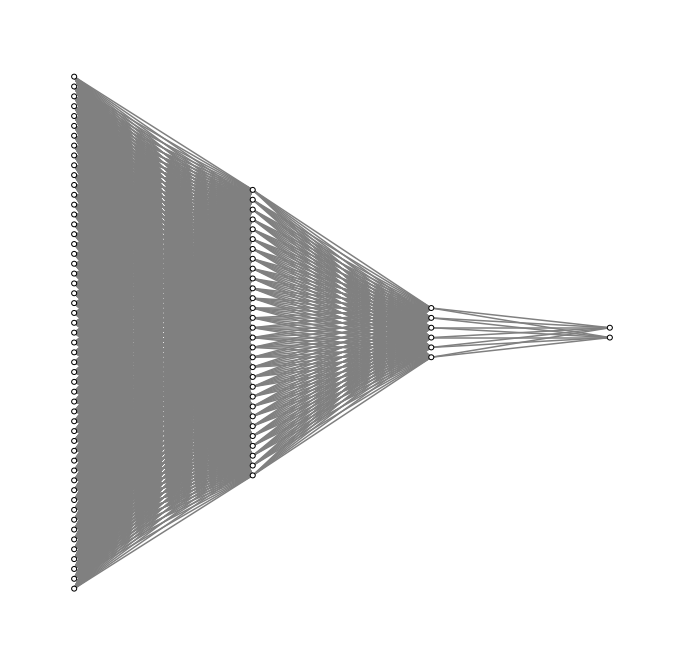

In [88]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [53,30,6,2])
fig.show()

# Model tuning 

Comparing the models, the MLP classifer appear to be the most promising models, so lets apply to it the tuning of the hyperparameters and after that, both the tuning and SMOTE together

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

##MLP tuning

##### MLP Classifier with RandomizedSearch

In [90]:
MLP_pipe = Pipeline([     
 ('norm', StandardScaler()),  
 ('pca', PCA(n_components=53)),
 ('clf', MLPClassifier(hidden_layer_sizes= (30, 6), random_state=42, 
                          max_iter=1000, activation = 'identity',
                          early_stopping=True))
])

In [91]:
MLP_param_grid = {
    'clf__activation': ['identity'],
    'clf__solver': ['sgd', 'adam'],
    'clf__alpha': [0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05],
    'clf__learning_rate': ['constant','adaptive', 'invscaling'],
}

In [92]:
grid_MLP = RandomizedSearchCV(estimator=MLP_pipe, param_distributions=MLP_param_grid, 
                        scoring='f1_macro', cv=SKF, verbose=1, n_jobs=-1, n_iter=40)

In [93]:
grid_MLP.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   28.5s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('norm',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=53,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                                             ('clf',
                              

In [94]:
print("Best parameters found: ", grid_MLP.best_params_)

Best parameters found:  {'clf__solver': 'adam', 'clf__learning_rate': 'adaptive', 'clf__alpha': 0.01, 'clf__activation': 'identity'}


In [95]:
predictions_MLP = grid_MLP.predict(X_test)

In [96]:
print(classification_report(y_test, predictions_MLP))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       408
           1       0.59      0.60      0.59        78

    accuracy                           0.87       486
   macro avg       0.76      0.76      0.76       486
weighted avg       0.87      0.87      0.87       486



#### MLP with SMOTE

In [97]:
from imblearn.under_sampling import RandomUnderSampler

In [98]:
from imblearn.over_sampling import SVMSMOTE

In [99]:
SMOTE_MLP_pipe = Pipeline([ 
 ('norm', StandardScaler()),
 ('SMOTE', SMOTE(random_state=42)),                      
 ('pca', PCA(n_components=53)),
 ('clf', MLPClassifier(hidden_layer_sizes= (30, 6), random_state=42, 
                       max_iter=1000, activation = 'identity',
                       early_stopping=True))
])

In [100]:
grid_MLP = RandomizedSearchCV(estimator=SMOTE_MLP_pipe, param_distributions=MLP_param_grid, 
                        scoring='f1_macro', cv=SKF, verbose=1, n_jobs=-1, n_iter=40)

In [101]:
grid_MLP.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   38.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('norm',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('SMOTE',
                                              SMOTE(k_neighbors=5,
                                                    kind='deprecated',
                                                    m_neighbors='deprecated',
                                                    n_jobs=1,
                                                    out_step='deprecated',
                                                    random_state=42, ratio=None,
                                                    sampling_

In [102]:
print("Best parameters found: ", grid_MLP.best_params_)

Best parameters found:  {'clf__solver': 'adam', 'clf__learning_rate': 'invscaling', 'clf__alpha': 0.02, 'clf__activation': 'identity'}


In [103]:
predictions_MLP = grid_MLP.predict(X_test)

In [104]:
print(classification_report(y_test, predictions_MLP))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       408
           1       0.40      0.68      0.51        78

    accuracy                           0.79       486
   macro avg       0.67      0.74      0.69       486
weighted avg       0.85      0.79      0.81       486



## MLP from Keras and Tensorflow

In [117]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras 
from tensorflow.keras import layers

In [113]:
def MLPClassifier():
    model = keras.Sequential([
        layers.Dense(30, activation='linear', input_shape=(53,)), 
        layers.Dense(6, activation='linear'),
        layers.Dense(2, activation='sigmoid')
    ])
    #optimizer
    optimizer = tf.keras.optimizers.Adam()
    #compile model 
    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics = ['accuracy'])
    return model

In [114]:
model_Keras = KerasClassifier(build_fn=MLPClassifier, epochs=100, batch_size=32, verbose=1)

In [115]:
MLP_pipe_Keras = Pipeline([     
 ('norm', StandardScaler()),  
 ('pca', PCA(n_components=53)),
 ('clf', model_Keras)
])

In [118]:
predictions_MLP_Keras = cross_val_predict(MLP_pipe_Keras, X, y, cv = SKF)

Epoch 1/100
37/37 [==============================] - 1s 2ms/step - loss: 1.2929 - accuracy: 0.5065
Epoch 2/100
37/37 [==============================] - 0s 1ms/step - loss: 0.5670 - accuracy: 0.7240
Epoch 3/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3667 - accuracy: 0.8779
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.9108
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 0.9052
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2845 - accuracy: 0.9032
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.8886
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.8923
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.8871
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2891 - accuracy: 0.8989
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
37/37 [==============================] - 0s 2ms/step - loss: 1.2899 - accuracy: 0.5564
Epoch 2/100
37/37 [==============================] - 0s 1ms/step - loss: 0.6527 - accuracy: 0.7072
Epoch 3/100
37/37 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8542
Epoch 4/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3363 - accuracy: 0.8945
Epoch 5/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3036 - accuracy: 0.8960
Epoch 6/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3051 - accuracy: 0.8812
Epoch 7/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3029 - accuracy: 0.8862
Epoch 8/100
37/37 [==============================] - 0s 1ms/step - loss: 0.2887 - accuracy: 0.8881
Epoch 9/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8866
Epoch 10/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3254 - accuracy: 0.8844
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
37/37 [==============================] - 0s 2ms/step - loss: 1.1099 - accuracy: 0.5628
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7401
Epoch 3/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3702 - accuracy: 0.8680
Epoch 4/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3364 - accuracy: 0.8864
Epoch 5/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3071 - accuracy: 0.8882
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.8897
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.8857
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8863
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2803 - accuracy: 0.8877
Epoch 10/100
37/37 [==============================] - 0s 1ms/step - loss: 0.2882 - accuracy: 0.8922
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
37/37 [==============================] - 0s 1ms/step - loss: 0.7650 - accuracy: 0.5650
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.7406
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.8512
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8904
Epoch 5/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.8757
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.9109
Epoch 7/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3076 - accuracy: 0.8823
Epoch 8/100
37/37 [==============================] - 0s 1ms/step - loss: 0.2768 - accuracy: 0.9012
Epoch 9/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3118 - accuracy: 0.8870
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8850
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
37/37 [==============================] - 0s 2ms/step - loss: 1.4187 - accuracy: 0.5247
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.6923
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 0.8720
Epoch 4/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3219 - accuracy: 0.8732
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.8859
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2816 - accuracy: 0.8999
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.8945
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.8982
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2750 - accuracy: 0.8996
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2824 - accuracy: 0.8900
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [119]:
print(classification_report(y, predictions_MLP_Keras))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1233
           1       0.68      0.45      0.54       237

    accuracy                           0.88      1470
   macro avg       0.79      0.70      0.74      1470
weighted avg       0.87      0.88      0.87      1470



## MLP with Keras and RandomizedSearch

In [128]:
def MLPClassifier(activation_1='identity', activation_2='identity', activation_3='identity', optimizer='adam'):
    model = keras.Sequential([
        layers.Dense(30, activation=activation_1, input_shape=(53,)), 
        layers.Dense(6, activation=activation_2),
        layers.Dense(2, activation=activation_3)
    ])

    #compile model 
    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics = ['accuracy'])
    return model

In [129]:
model_Keras = KerasClassifier(build_fn=MLPClassifier, epochs=100, verbose=1)

In [130]:
param_grid = {
    'clf__activation_1': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
    'clf__activation_2': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
    'clf__activation_3': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
    'clf__optimizer': ['Adam', 'Adamax', 'Adadelta'],
    'clf__batch_size': [40, 60, 80, 100]}

In [131]:
MLP_pipe_Keras = Pipeline([     
 ('norm', StandardScaler()),  
 ('pca', PCA(n_components=53)),
 ('clf', model_Keras)
])

In [132]:
rs_keras = RandomizedSearchCV(MLP_pipe_Keras, param_grid, cv=SKF, scoring='f1_macro', refit='f1_macro', verbose=3, n_jobs=1,random_state=42, n_iter=60)
rs_keras.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=linear, clf__activation_2=softmax, clf__activation_1=softplus 
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


10/10 [==============================] - 0s 2ms/step - loss: 12.7573 - accuracy: 0.1706
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 12.9923 - accuracy: 0.1527
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 12.6986 - accuracy: 0.1719
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 12.7011 - accuracy: 0.1705
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 12.7365 - accuracy: 0.1684
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 12.8493 - accuracy: 0.1607
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 12.7157 - accuracy: 0.1716
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 12.8274 - accuracy: 0.1657
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 12.9115 - accuracy: 0.1567
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 12.7350 - accuracy: 0.1702
Epoch 11/10

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 1.7911 - accuracy: 0.2370
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1.8452 - accuracy: 0.2352
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 1.5928 - accuracy: 0.2642
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 1.6151 - accuracy: 0.2653
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 1.6130 - accuracy: 0.2501
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 1.5887 - accuracy: 0.2806
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 1.6563 - accuracy: 0.2673
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 1.6477 - accuracy: 0.2580
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 1.4851 - accuracy: 0.2522
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 1.6613 - accuracy: 0.2537
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.3s remaining:    0.0s


Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 1.4111 - accuracy: 0.3580
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1.4497 - accuracy: 0.3729
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 1.4212 - accuracy: 0.3759
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 1.4681 - accuracy: 0.3543
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 1.4099 - accuracy: 0.3776
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 1.5185 - accuracy: 0.3493
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 1.5078 - accuracy: 0.3492
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 1.4202 - accuracy: 0.3427
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 1.5661 - accuracy: 0.3626
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 1.2606 - accuracy: 0.3710
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 3.0505 - accuracy: 0.2861
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8061 - accuracy: 0.2882
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 2.9219 - accuracy: 0.3094
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 2.8318 - accuracy: 0.2853
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 2.6044 - accuracy: 0.2932
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 2.8834 - accuracy: 0.2850
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 3.0629 - accuracy: 0.2850
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 2.7678 - accuracy: 0.3102
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 2.8470 - accuracy: 0.2929
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8375 - accuracy: 0.3026
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9020 - accuracy: 0.7054
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9773 - accuracy: 0.6910
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8556 - accuracy: 0.6934
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8644 - accuracy: 0.6880
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8574 - accuracy: 0.7197
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8874 - accuracy: 0.7028
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8920 - accuracy: 0.7002
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9274 - accuracy: 0.6837
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9204 - accuracy: 0.6966
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9272 - accuracy: 0.6858
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6477
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.6373
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.6283
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6529 - accuracy: 0.6545
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.6486
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.6389
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.6567
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6668
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.6589
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.6480
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.6979
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.7213
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.7097
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.7198
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.7033
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.7021
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.6915
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.7101
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.7036
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.6977
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4968
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5010
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.5101
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5180
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5276
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.4859
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7088 - accuracy: 0.4944
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.5144
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7095 - accuracy: 0.4737
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5247
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5762
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.5993
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5969
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6144
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5822
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.5858
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5996
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6000
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.5859
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5864
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.5936
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.6110
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.6260
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.6095
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.6082
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.6014
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.5801
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.6150
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.6072
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.6157
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8338
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.8365
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8266
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.8558
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8504
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8293
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8225
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.8451
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.8573
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.8466
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7289 - accuracy: 0.8374
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.8274
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8367
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.8629
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.8535
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8434
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8343
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8350
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.8239
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8462
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 12.5785 - accuracy: 0.1849
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 12.6003 - accuracy: 0.1650
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 12.0866 - accuracy: 0.1644
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 8.2331 - accuracy: 0.3561
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.3279 - accuracy: 0.8155
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.8327
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8369
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8217
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8299
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.8425
Epoch 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1188 - accuracy: 0.3010
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.6712
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5253 - accuracy: 0.8590
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5359 - accuracy: 0.8374
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.8347
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.8422
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.8415
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8399
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3615 - accuracy: 0.8395
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8492
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.8390
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.8451
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4297 - accuracy: 0.8373
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8521
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.8433
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8406
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3639 - accuracy: 0.8530
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.8375
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3849 - accuracy: 0.8335
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3561 - accuracy: 0.8570
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.8533
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8471
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8443
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8437
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8412
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8527
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.8216
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4411 - accuracy: 0.8336
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4415 - accuracy: 0.8298
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4306 - accuracy: 0.8360
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.8344
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.8423
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5124 - accuracy: 0.8395
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.8488
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.8294
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.8424
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.8309
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4499 - accuracy: 0.8333
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8334
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.8437
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.8216
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.8304
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.8498
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.8424
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5106 - accuracy: 0.8427
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4949 - accuracy: 0.8400
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.8336
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.8245
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4786 - accuracy: 0.8274
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.8478
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 1.5861 - accuracy: 0.1633
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1.4508 - accuracy: 0.1557
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 1.2956 - accuracy: 0.1684
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 1.1910 - accuracy: 0.1617
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0807 - accuracy: 0.1699
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0049 - accuracy: 0.1506
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9168 - accuracy: 0.1576
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8487 - accuracy: 0.1587
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7875 - accuracy: 0.1935
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7381 - accuracy: 0.3083
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1355 - accuracy: 0.1681
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0240 - accuracy: 0.1675
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9401 - accuracy: 0.1587
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8513 - accuracy: 0.1720
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7911 - accuracy: 0.2028
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7369 - accuracy: 0.3405
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5600
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.6954
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6087 - accuracy: 0.7961
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5750 - accuracy: 0.8432
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 3.1369 - accuracy: 0.4522
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 2.7672 - accuracy: 0.4898
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 3.0275 - accuracy: 0.4839
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 2.6078 - accuracy: 0.5206
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 2.3880 - accuracy: 0.5203
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 2.4609 - accuracy: 0.5302
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 2.4932 - accuracy: 0.5031
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 2.5465 - accuracy: 0.5130
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 2.5171 - accuracy: 0.5259
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 2.2906 - accuracy: 0.5286
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 2.0922 - accuracy: 0.5539
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 2.0093 - accuracy: 0.5318
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 1.7242 - accuracy: 0.5365
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 1.6070 - accuracy: 0.5460
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 1.3891 - accuracy: 0.5514
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 1.4250 - accuracy: 0.5478
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 1.6452 - accuracy: 0.5627
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 1.4472 - accuracy: 0.5560
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 1.5653 - accuracy: 0.5367
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 1.4682 - accuracy: 0.5706
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 5.9575 - accuracy: 0.4664
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 5.2739 - accuracy: 0.5088
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 5.3685 - accuracy: 0.5171
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 5.0425 - accuracy: 0.5439
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 5.0249 - accuracy: 0.5171
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 4.8651 - accuracy: 0.5196
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 4.9208 - accuracy: 0.5212
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 4.9321 - accuracy: 0.5150
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 4.4948 - accuracy: 0.5615
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 4.8312 - accuracy: 0.5339
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 3ms/step - loss: 3.4585 - accuracy: 0.5087
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 2.7399 - accuracy: 0.5203
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 2.7253 - accuracy: 0.5390
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 2.5494 - accuracy: 0.5606
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 2.9032 - accuracy: 0.5182
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 2.8691 - accuracy: 0.5207
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 2.7529 - accuracy: 0.5296
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 2.8473 - accuracy: 0.5242
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 2.5469 - accuracy: 0.5676
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 2.6556 - accuracy: 0.5430
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 3.2747 - accuracy: 0.5613
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 3.0603 - accuracy: 0.5561
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 3.0780 - accuracy: 0.5639
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 2.9890 - accuracy: 0.5625
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 2.8114 - accuracy: 0.5754
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 2.7369 - accuracy: 0.5773
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 2.6146 - accuracy: 0.5868
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 2.9231 - accuracy: 0.5701
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 2.8851 - accuracy: 0.5708
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 2.8082 - accuracy: 0.5444
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6203
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.6186
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.6400
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.6318
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.6201
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.6504
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6284
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6157
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 0.6175
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 0.6032
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7117 - accuracy: 0.4451
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7136 - accuracy: 0.4415
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7115 - accuracy: 0.4641
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7096 - accuracy: 0.4592
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7120 - accuracy: 0.4502
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7141 - accuracy: 0.4366
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7138 - accuracy: 0.4379
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7064 - accuracy: 0.4682
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7159 - accuracy: 0.4395
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7150 - accuracy: 0.4292
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7208 - accuracy: 0.2530
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7202 - accuracy: 0.2674
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7207 - accuracy: 0.2492
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7213 - accuracy: 0.2428
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7214 - accuracy: 0.2445
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7212 - accuracy: 0.2438
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7193 - accuracy: 0.2567
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7218 - accuracy: 0.2487
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7212 - accuracy: 0.2397
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7209 - accuracy: 0.2542
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.6119
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.6644
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.6384
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6422
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.6244
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.6540
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6800 - accuracy: 0.6235
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.6658
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.6321
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.6455
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6761
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6675 - accuracy: 0.6630
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6647 - accuracy: 0.6524
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6595
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.6681
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.6938
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6615 - accuracy: 0.6787
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.6601
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.6587
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.6730
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5552 - accuracy: 0.7591
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5371 - accuracy: 0.7744
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5169 - accuracy: 0.7680
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.7983
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8096
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4327 - accuracy: 0.8255
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8358
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.8435
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3740 - accuracy: 0.8472
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3652 - accuracy: 0.8624
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8880 - accuracy: 0.4794
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7775 - accuracy: 0.5255
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7471 - accuracy: 0.5434
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.6083
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6400 - accuracy: 0.6091
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6074 - accuracy: 0.6655
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.6890
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.7224
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5103 - accuracy: 0.7728
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.7739
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 1.2205 - accuracy: 0.4026
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0445 - accuracy: 0.4620
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.9215 - accuracy: 0.5113
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8545 - accuracy: 0.5356
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7684 - accuracy: 0.5919
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7301 - accuracy: 0.6261
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6653 - accuracy: 0.6685
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6245 - accuracy: 0.6954
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.7467
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5838 - accuracy: 0.7423
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6683
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6044 - accuracy: 0.7259
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5593 - accuracy: 0.7427
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.7700
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7986
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4621 - accuracy: 0.8246
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7988
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4402 - accuracy: 0.8269
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4121 - accuracy: 0.8398
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.8466
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 2.1357 - accuracy: 0.2192
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 1.8770 - accuracy: 0.2217
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 1.6284 - accuracy: 0.2439
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 1.4202 - accuracy: 0.2880
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 1.3037 - accuracy: 0.3234
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1021 - accuracy: 0.3577
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0454 - accuracy: 0.3706
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9459 - accuracy: 0.4489
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8968 - accuracy: 0.4673
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8169 - accuracy: 0.4944
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.6985
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.7814
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6664 - accuracy: 0.8030
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.8270
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.8387
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6391 - accuracy: 0.8308
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.8146
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6198 - accuracy: 0.8461
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6088 - accuracy: 0.8470
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6053 - accuracy: 0.8288
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.3505
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5226
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.6987
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.8089
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.8397
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.8482
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6488 - accuracy: 0.8422
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6434 - accuracy: 0.8293
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.8365
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6228 - accuracy: 0.8507
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.2987
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4915
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.6496
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.7565
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.8156
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6601 - accuracy: 0.8194
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.8408
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.8364
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6343 - accuracy: 0.8382
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.8373
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5431
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.7521
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.8235
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.8282
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6636 - accuracy: 0.8483
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6576 - accuracy: 0.8429
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6529 - accuracy: 0.8344
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6449 - accuracy: 0.8509
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6374 - accuracy: 0.8578
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.8540
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.3749
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5680
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.7296
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.7905
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.8408
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.8316
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6461 - accuracy: 0.8415
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6397 - accuracy: 0.8317
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.8491
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6254 - accuracy: 0.8302
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 1.4512 - accuracy: 0.1859
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7532 - accuracy: 0.2199
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7113 - accuracy: 0.2354
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7151 - accuracy: 0.2562
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.2749
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.2826
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.2870
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.3283
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.3343
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.2996
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 10.0350 - accuracy: 0.1962
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 4.4332 - accuracy: 0.3218
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.9453 - accuracy: 0.4859
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0028 - accuracy: 0.6312
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9815 - accuracy: 0.6842
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9807 - accuracy: 0.6457
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7350 - accuracy: 0.6560
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.6195
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.6330
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.6295
Epoch 11

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 4ms/step - loss: 6.0876 - accuracy: 0.2734
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.8134 - accuracy: 0.6553
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1278 - accuracy: 0.7505
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8614 - accuracy: 0.7894
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6526 - accuracy: 0.7962
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7325 - accuracy: 0.7845
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.7982
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7178 - accuracy: 0.7699
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.7680
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8065 - accuracy: 0.7952
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 4ms/step - loss: 1.5878 - accuracy: 0.2479
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.5504
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.7581
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6246 - accuracy: 0.8133
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5628 - accuracy: 0.8398
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6162 - accuracy: 0.8445
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6398 - accuracy: 0.8254
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6104 - accuracy: 0.8386
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5525 - accuracy: 0.8161
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5531 - accuracy: 0.8587
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7561 - accuracy: 0.3648
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.6749
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.8231
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5825 - accuracy: 0.8453
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.8428
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4581 - accuracy: 0.8389
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4587 - accuracy: 0.8366
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4623 - accuracy: 0.8436
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.8374
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4859 - accuracy: 0.8417
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9180 - accuracy: 0.1586
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8608 - accuracy: 0.1689
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8198 - accuracy: 0.1613
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7761 - accuracy: 0.1668
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7376 - accuracy: 0.1711
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7065 - accuracy: 0.3325
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.7112
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.8447
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6240 - accuracy: 0.8427
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6008 - accuracy: 0.8455
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4411 - accuracy: 0.8364
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4377 - accuracy: 0.8355
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4227 - accuracy: 0.8467
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.8463
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.8371
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4415 - accuracy: 0.8312
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4210 - accuracy: 0.8433
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8445
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4287 - accuracy: 0.8344
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8479
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7344 - accuracy: 0.3333
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.5945
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.7818
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5901 - accuracy: 0.8432
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5546 - accuracy: 0.8571
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5370 - accuracy: 0.8337
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5104 - accuracy: 0.8449
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4952 - accuracy: 0.8365
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.8466
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4749 - accuracy: 0.8353
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.4242
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.7886
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6224 - accuracy: 0.8444
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5964 - accuracy: 0.8305
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5716 - accuracy: 0.8333
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5528 - accuracy: 0.8301
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5297 - accuracy: 0.8413
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5076 - accuracy: 0.8491
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.8554
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.8428
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=softmax, clf__activation_2=hard_sigmoid, clf__activation_1=sigmoid, score=0.545, total=   4.4s
[CV] clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=softmax, clf__activation_2=hard_sigmoid, clf__activation_1=sigmoid 
Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9828 - accuracy: 0.1638
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9104 - accuracy: 0.1522
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8422 - accuracy: 0.1556
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7756 - accuracy: 0.2030
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7345 - accuracy: 0.2906
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.5482
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6496 - accuracy: 0.7412
Epoch 8/100
8/8 [======

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8561 - accuracy: 0.5245
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7780 - accuracy: 0.5597
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7568 - accuracy: 0.5689
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7294 - accuracy: 0.5848
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7080 - accuracy: 0.6041
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.6230
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6539 - accuracy: 0.6263
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6168 - accuracy: 0.6553
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6198 - accuracy: 0.6469
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5811 - accuracy: 0.7017
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8665 - accuracy: 0.4748
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7941 - accuracy: 0.5377
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7396 - accuracy: 0.5557
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7048 - accuracy: 0.5733
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7007 - accuracy: 0.5736
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.6236
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6159 - accuracy: 0.6517
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6130 - accuracy: 0.6252
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5853 - accuracy: 0.6777
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.6858
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8090 - accuracy: 0.4821
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7626 - accuracy: 0.5105
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7340 - accuracy: 0.5324
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7078 - accuracy: 0.5428
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5736
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6406 - accuracy: 0.6301
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6235 - accuracy: 0.6526
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6088 - accuracy: 0.6546
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5951 - accuracy: 0.6650
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5806 - accuracy: 0.7029
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7441 - accuracy: 0.4670
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7210 - accuracy: 0.5082
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5427
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.5901
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6615 - accuracy: 0.6119
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6377 - accuracy: 0.6656
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6248 - accuracy: 0.6887
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5992 - accuracy: 0.7166
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6048 - accuracy: 0.7113
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6008 - accuracy: 0.7139
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7190 - accuracy: 0.4988
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7182 - accuracy: 0.4874
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5492
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.5976
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.6015
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6442 - accuracy: 0.6096
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6261 - accuracy: 0.6539
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.6416
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.7016
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5860 - accuracy: 0.7284
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 1.5623 - accuracy: 0.6602
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 1.2440 - accuracy: 0.6912
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1868 - accuracy: 0.7100
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2100 - accuracy: 0.7007
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9521 - accuracy: 0.7307
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0781 - accuracy: 0.7247
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9329 - accuracy: 0.7673
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8562 - accuracy: 0.7761
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8750 - accuracy: 0.7567
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9291 - accuracy: 0.7661
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 2.5774 - accuracy: 0.6832
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 2.0451 - accuracy: 0.7254
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.9877 - accuracy: 0.7366
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.9490 - accuracy: 0.7835
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 1.7571 - accuracy: 0.7860
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1.5043 - accuracy: 0.7960
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 1.5856 - accuracy: 0.7872
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2348 - accuracy: 0.8031
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 1.2771 - accuracy: 0.8140
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 1.3328 - accuracy: 0.7982
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 1.5647 - accuracy: 0.6492
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2855 - accuracy: 0.6310
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1381 - accuracy: 0.6276
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0068 - accuracy: 0.6379
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 1.0548 - accuracy: 0.5977
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9838 - accuracy: 0.5916
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9430 - accuracy: 0.6209
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9359 - accuracy: 0.6295
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9815 - accuracy: 0.6253
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8835 - accuracy: 0.6086
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 1.6480 - accuracy: 0.6031
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.3176 - accuracy: 0.6087
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0946 - accuracy: 0.6294
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8814 - accuracy: 0.6127
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8818 - accuracy: 0.6427
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7770 - accuracy: 0.6778
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7267 - accuracy: 0.6375
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.6407
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.6400
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7577 - accuracy: 0.6574
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 5ms/step - loss: 5.2570 - accuracy: 0.5570
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 4.6825 - accuracy: 0.5675
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 4.2371 - accuracy: 0.5853
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 3.7390 - accuracy: 0.5961
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 3.5938 - accuracy: 0.6064
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 3.0017 - accuracy: 0.6291
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 2.7677 - accuracy: 0.5939
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 2.6827 - accuracy: 0.6342
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5091 - accuracy: 0.6402
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 1.8532 - accuracy: 0.6683
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.5643
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5761 - accuracy: 0.7161
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7886
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.8244
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8630
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4095 - accuracy: 0.8604
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3835 - accuracy: 0.8717
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3638 - accuracy: 0.8805
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3331 - accuracy: 0.8831
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.8856
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.7562
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4295 - accuracy: 0.8220
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3986 - accuracy: 0.8562
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3551 - accuracy: 0.8547
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3316 - accuracy: 0.8634
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3384 - accuracy: 0.8586
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8732
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3186 - accuracy: 0.8610
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2905 - accuracy: 0.8844
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3168 - accuracy: 0.8823
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5188 - accuracy: 0.8302
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4204 - accuracy: 0.8586
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.8404
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4317 - accuracy: 0.8231
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.8334
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3846 - accuracy: 0.8310
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3520 - accuracy: 0.8413
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3604 - accuracy: 0.8316
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3105 - accuracy: 0.8545
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3265 - accuracy: 0.8416
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7275 - accuracy: 0.4775
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.6668
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5651 - accuracy: 0.7760
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5117 - accuracy: 0.8445
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.8518
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4487 - accuracy: 0.8491
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.8403
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3825 - accuracy: 0.8663
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8395
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3414 - accuracy: 0.8705
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7196 - accuracy: 0.5607
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6075 - accuracy: 0.6689
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7753
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4677 - accuracy: 0.8190
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4439 - accuracy: 0.8359
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3872 - accuracy: 0.8669
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3787 - accuracy: 0.8584
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.8669
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3507 - accuracy: 0.8638
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3384 - accuracy: 0.8753
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 3ms/step - loss: 2.2037 - accuracy: 0.8513
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 2.0310 - accuracy: 0.8406
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 1.7887 - accuracy: 0.8255
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 1.1999 - accuracy: 0.8457
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 1.1702 - accuracy: 0.8249
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9039 - accuracy: 0.8342
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 1.0081 - accuracy: 0.8460
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9800 - accuracy: 0.8403
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8388 - accuracy: 0.8464
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7997 - accuracy: 0.8438
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 12.6032 - accuracy: 0.1670
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 11.9593 - accuracy: 0.1846
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 9.9646 - accuracy: 0.2534
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 6.1659 - accuracy: 0.4561
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 2.6307 - accuracy: 0.7007
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 1.4170 - accuracy: 0.8013
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 1.0089 - accuracy: 0.8041
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8325 - accuracy: 0.8446
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7466 - accuracy: 0.8425
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.8444
Epoch 1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 3ms/step - loss: 2.4473 - accuracy: 0.8426
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 2.9141 - accuracy: 0.8044
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 1.9389 - accuracy: 0.8365
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 1.4991 - accuracy: 0.8433
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 1.4875 - accuracy: 0.8393
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 1.1416 - accuracy: 0.8348
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 1.1627 - accuracy: 0.8275
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9183 - accuracy: 0.8482
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9988 - accuracy: 0.8364
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9591 - accuracy: 0.8455
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8227 - accuracy: 0.8235
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.8231
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.8464
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4377 - accuracy: 0.8441
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4304 - accuracy: 0.8410
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4237 - accuracy: 0.8398
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8351
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.8356
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4222 - accuracy: 0.8341
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3853 - accuracy: 0.8558
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 3ms/step - loss: 1.2702 - accuracy: 0.8280
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9733 - accuracy: 0.8282
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7112 - accuracy: 0.8332
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7883 - accuracy: 0.8220
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8209 - accuracy: 0.8349
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8152 - accuracy: 0.8311
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.8516
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.7256 - accuracy: 0.8541
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7488 - accuracy: 0.8284
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7695 - accuracy: 0.8194
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 12.8775 - accuracy: 0.1638
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 12.8662 - accuracy: 0.1626
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 13.0351 - accuracy: 0.1495
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 12.6969 - accuracy: 0.1694
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 12.7547 - accuracy: 0.1634
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 12.7737 - accuracy: 0.1595
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 12.8864 - accuracy: 0.1491
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 12.4258 - accuracy: 0.1761
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 12.7100 - accuracy: 0.1536
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 12.5660 - accuracy: 0.1590
Epoch 11/100
8/8 [=

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



2/2 [==============================] - 0s 6ms/step
[CV]  clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=softmax, score=0.140, total=   4.7s
[CV] clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=softmax 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 12.5052 - accuracy: 0.1512
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 12.0082 - accuracy: 0.1766
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 12.0349 - accuracy: 0.1648
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 11.7707 - accuracy: 0.1702
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 11.5180 - accuracy: 0.1688
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 11.2245 - accuracy: 0.1546
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 6ms/step - loss: 11.6928 - accuracy: 0.1755
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 11.3978 - accuracy: 0.1754
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 11.1946 - accuracy: 0.1571
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 10.2574 - accuracy: 0.1644
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 8.4514 - accuracy: 0.1725
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 6.8335 - accuracy: 0.1640
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 4.1716 - accuracy: 0.1656
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 2.3884 - accuracy: 0.1652
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 1.7400 - accuracy: 0.1593
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 1.4086 - accuracy: 0.1572
Epoch 11/100
8/8 [=======

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 12.9542 - accuracy: 0.1568
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 12.7788 - accuracy: 0.1662
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 12.6846 - accuracy: 0.1703
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 12.6173 - accuracy: 0.1723
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 12.7651 - accuracy: 0.1603
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 12.7744 - accuracy: 0.1569
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 12.6817 - accuracy: 0.1599
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 12.4565 - accuracy: 0.1714
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 12.5684 - accuracy: 0.1601
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 12.3477 - accuracy: 0.1707
Epoch 11/100
8/8 [=

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



2/2 [==============================] - 0s 5ms/step
[CV]  clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=softmax, score=0.140, total=   5.1s
[CV] clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=softmax 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 1.6461 - accuracy: 0.3927
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0177 - accuracy: 0.6845
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 1.0149 - accuracy: 0.7782
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9362 - accuracy: 0.8052
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8897 - accuracy: 0.8100
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7886 - accuracy: 0.8007
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.73

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=softmax, score=0.457, total=   4.9s
[CV] clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=tanh, clf__activation_2=softplus, clf__activation_1=softsign 
Epoch 1/100
14/14 [==============================] - 1s 4ms/step - loss: 2.7101 - accuracy: 0.6042
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 2.7803 - accuracy: 0.5972
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 2.3463 - accuracy: 0.6232
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 2.6791 - accuracy: 0.6243
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 2.5352 - accuracy: 0.6333
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 2.6895 - accuracy: 0.6204
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 2.6815 - accuracy: 0.6142
Epoch 8/100
14/14

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



4/4 [==============================] - 0s 3ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=tanh, clf__activation_2=softplus, clf__activation_1=softsign, score=0.419, total=   5.7s
[CV] clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=tanh, clf__activation_2=softplus, clf__activation_1=softsign 
Epoch 1/100
14/14 [==============================] - 0s 3ms/step - loss: 2.0402 - accuracy: 0.1791
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 2.2573 - accuracy: 0.1572
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 2.1422 - accuracy: 0.1655
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 2.0853 - accuracy: 0.1669
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 2.2364 - accuracy: 0.1591
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 2.1501 - accuracy: 0.1644
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 9.6517 - accuracy: 0.1684
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 9.8751 - accuracy: 0.1562
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 10.0526 - accuracy: 0.1491
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 9.9831 - accuracy: 0.1803
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 10.2813 - accuracy: 0.1396
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 9.9869 - accuracy: 0.1732
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 9.6814 - accuracy: 0.1600
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 10.1103 - accuracy: 0.1643
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 9.8565 - accuracy: 0.1702
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 10.2377 - accuracy: 0.1640
Epoch

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 4.0481 - accuracy: 0.5219
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 3.8657 - accuracy: 0.5287
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 3.8848 - accuracy: 0.5348
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 3.9456 - accuracy: 0.5121
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 3.9778 - accuracy: 0.5233
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 3.9920 - accuracy: 0.5120
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 3.7243 - accuracy: 0.5118
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 4.2437 - accuracy: 0.5019
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 4.1895 - accuracy: 0.5156
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 3.7406 - accuracy: 0.5256
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 3ms/step - loss: 9.9891 - accuracy: 0.1508
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 9.6295 - accuracy: 0.1747
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 9.9273 - accuracy: 0.1467
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 9.6882 - accuracy: 0.1678
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 9.9924 - accuracy: 0.1724
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 9.9284 - accuracy: 0.1618
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 9.4475 - accuracy: 0.1639
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 9.9370 - accuracy: 0.1518
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 10.0146 - accuracy: 0.1596
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 9.8098 - accuracy: 0.1680
Epoch 11

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 0.8595 - accuracy: 0.2008
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7175 - accuracy: 0.4346
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.7491
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.8328
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5075 - accuracy: 0.8397
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.8317
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.8441
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.8373
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8542
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.8349
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.7640
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.8195
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.8413
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.8394
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8440
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4442 - accuracy: 0.8348
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4499 - accuracy: 0.8236
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8486
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8336
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8501
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=softmax, clf__activation_2=softmax, clf__activation_1=softplus, score=0.709, total=   6.6s
[CV] clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=softmax, clf__activation_2=softmax, clf__activation_1=softplus 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5318
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.8020
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.8235
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.8423
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4856 - accuracy: 0.8501
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.8155
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.8469
Epoch 8/100
20/20 [

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.4821
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6030 - accuracy: 0.7316
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.8175
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.8251
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.8441
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.8387
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.8374
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8314
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4283 - accuracy: 0.8299
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8384
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7919 - accuracy: 0.3278
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.5774
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.7552
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.8194
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.8320
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.8264
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8345
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8501
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8331
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8453
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9519 - accuracy: 0.7068
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7182 - accuracy: 0.7118
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7155 - accuracy: 0.7058
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7278 - accuracy: 0.7170
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7107 - accuracy: 0.7085
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7082 - accuracy: 0.6908
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.6933
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.7226
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6773 - accuracy: 0.6754
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6714 - accuracy: 0.6905
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=60, clf__activation_3=linear, clf__activation_2=softmax, clf__activation_1=relu, score=0.514, total=   6.2s
[CV] clf__optimizer=Adam, clf__batch_size=60, clf__activation_3=linear, clf__activation_2=softmax, clf__activation_1=relu 
Epoch 1/100
14/14 [==============================] - 0s 3ms/step - loss: 3.1604 - accuracy: 0.5111
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 1.8251 - accuracy: 0.6742
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 1.5585 - accuracy: 0.7505
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 1.2627 - accuracy: 0.7879
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9995 - accuracy: 0.7986
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8699 - accuracy: 0.7963
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9459 - accuracy: 0.8148
Epoch 8/100
14/14 [==============

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 0s 3ms/step - loss: 5.9723 - accuracy: 0.3528
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 4.5701 - accuracy: 0.4756
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 3.6019 - accuracy: 0.5875
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 2.6625 - accuracy: 0.6528
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 2.0463 - accuracy: 0.7016
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 1.7125 - accuracy: 0.7400
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 1.7453 - accuracy: 0.7574
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 1.4517 - accuracy: 0.7739
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 1.1651 - accuracy: 0.8088
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 1.4432 - accuracy: 0.7835
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 5.3938 - accuracy: 0.2668
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 3.5771 - accuracy: 0.3674
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 2.1602 - accuracy: 0.4834
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 1.5130 - accuracy: 0.6165
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 1.2655 - accuracy: 0.6448
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 1.0823 - accuracy: 0.7446
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 1.0444 - accuracy: 0.7486
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9873 - accuracy: 0.7415
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 0.8723 - accuracy: 0.7708
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7870 - accuracy: 0.7403
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=60, clf__activation_3=linear, clf__activation_2=softmax, clf__activation_1=relu, score=0.646, total=   6.3s
[CV] clf__optimizer=Adam, clf__batch_size=60, clf__activation_3=linear, clf__activation_2=softmax, clf__activation_1=relu 
Epoch 1/100
14/14 [==============================] - 0s 3ms/step - loss: 1.1349 - accuracy: 0.8132
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9986 - accuracy: 0.8114
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9789 - accuracy: 0.8399
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8535 - accuracy: 0.8505
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.7949 - accuracy: 0.8397
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6280 - accuracy: 0.8513
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5659 - accuracy: 0.8537
Epoch 8/100
14/14 [==============

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 0s 5ms/step - loss: 3.4179 - accuracy: 0.5795
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 2.8712 - accuracy: 0.6207
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 2.8843 - accuracy: 0.6335
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 2.8967 - accuracy: 0.6138
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 2.6515 - accuracy: 0.6206
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 2.7195 - accuracy: 0.6054
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 2.6954 - accuracy: 0.6133
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 2.4377 - accuracy: 0.6233
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 2.3203 - accuracy: 0.6422
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 2.2405 - accuracy: 0.6426
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=relu, clf__activation_2=softsign, clf__activation_1=linear, score=0.547, total=   4.6s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=relu, clf__activation_2=softsign, clf__activation_1=linear 
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 6.3868 - accuracy: 0.5471
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 5.9927 - accuracy: 0.5613
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 5.6956 - accuracy: 0.5664
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 5.5228 - accuracy: 0.5828
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 5.3408 - accuracy: 0.5952
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 5.5850 - accuracy: 0.5949
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 5.3903 - accuracy: 0.5952
Epoch 8/100
10/10 [========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 3.7625 - accuracy: 0.6090
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 3.5285 - accuracy: 0.6251
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 3.5440 - accuracy: 0.6309
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 3.2860 - accuracy: 0.6378
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 3.3901 - accuracy: 0.6246
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 3.3350 - accuracy: 0.6426
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 3.2421 - accuracy: 0.6383
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 3.1417 - accuracy: 0.6447
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 3.4332 - accuracy: 0.6249
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 3.1916 - accuracy: 0.6697
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 3.3929 - accuracy: 0.5909
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 3.1790 - accuracy: 0.6327
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 3.2118 - accuracy: 0.6134
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 2.7684 - accuracy: 0.6325
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8211 - accuracy: 0.6468
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.9837 - accuracy: 0.6276
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 2.9425 - accuracy: 0.6321
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 3.1523 - accuracy: 0.6189
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8862 - accuracy: 0.6243
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 3.1207 - accuracy: 0.6296
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 3.8595 - accuracy: 0.5918
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 3.3332 - accuracy: 0.6228
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 2.9833 - accuracy: 0.6356
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8620 - accuracy: 0.6661
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 2.7888 - accuracy: 0.6841
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.9153 - accuracy: 0.6560
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 2.9319 - accuracy: 0.6514
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8219 - accuracy: 0.6526
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 2.6237 - accuracy: 0.6601
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 2.6182 - accuracy: 0.6797
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 4.0981 - accuracy: 0.2558
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2578 - accuracy: 0.2438
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 2.5825 - accuracy: 0.3037
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 2.3979 - accuracy: 0.3306
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 1.8797 - accuracy: 0.3496
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 1.9297 - accuracy: 0.3265
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 1.5074 - accuracy: 0.3586
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 1.7355 - accuracy: 0.3711
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 1.4109 - accuracy: 0.3821
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 1.3482 - accuracy: 0.3920
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=relu, score=0.448, total=   5.1s
[CV] clf__optimizer=Adam, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 5ms/step - loss: 1.5925 - accuracy: 0.8101
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.4258 - accuracy: 0.8099
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1339 - accuracy: 0.8366
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1954 - accuracy: 0.8013
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 1.1436 - accuracy: 0.8077
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9764 - accuracy: 0.8109
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9413 - accuracy: 0.8230
Epoch 8/100
8/8 [======================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 1.2566 - accuracy: 0.6471
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9280 - accuracy: 0.6718
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8805 - accuracy: 0.7059
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8114 - accuracy: 0.7115
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7440 - accuracy: 0.7000
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7343 - accuracy: 0.7016
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7068 - accuracy: 0.7029
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6993 - accuracy: 0.7192
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7453 - accuracy: 0.6798
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.6983
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



2/2 [==============================] - 0s 3ms/step
[CV]  clf__optimizer=Adam, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=relu, score=0.571, total=   5.2s
[CV] clf__optimizer=Adam, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 1.7544 - accuracy: 0.3545
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 1.3106 - accuracy: 0.3711
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 1.0256 - accuracy: 0.4435
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 1.0343 - accuracy: 0.4618
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9576 - accuracy: 0.4760
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8032 - accuracy: 0.4972
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7748 - accur

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=relu, score=0.504, total=   5.1s
[CV] clf__optimizer=Adam, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.8040 - accuracy: 0.7772
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7659 - accuracy: 0.7784
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.8064
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.7969
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.7917
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6866 - accuracy: 0.7821
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.7669
Epoch 8/100
8/8 [======================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 11.4328 - accuracy: 0.1697
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 10.4646 - accuracy: 0.1576
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 9.8854 - accuracy: 0.1572
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 9.4181 - accuracy: 0.1581
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 9.2661 - accuracy: 0.1613
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 9.2186 - accuracy: 0.1590
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 8.2415 - accuracy: 0.1708
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 7.7707 - accuracy: 0.1752
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 7.6755 - accuracy: 0.1618
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 6.9575 - accuracy: 0.1664
Epoch 1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



3/3 [==============================] - 0s 10ms/step
[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=linear, clf__activation_1=hard_sigmoid, score=0.457, total=   5.2s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=linear, clf__activation_1=hard_sigmoid 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 1.8972 - accuracy: 0.7017
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.5510 - accuracy: 0.7187
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.3961 - accuracy: 0.7520
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1553 - accuracy: 0.7880
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0341 - accuracy: 0.7854
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 1.2217 - accuracy: 0.7788
Epoch 7/100
10/10 [==============================] - 0s 3m

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 2.4393 - accuracy: 0.8411
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2145 - accuracy: 0.8504
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 2.0733 - accuracy: 0.8386
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 2.1568 - accuracy: 0.8207
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.9046 - accuracy: 0.8229
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1.6511 - accuracy: 0.8236
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 1.7132 - accuracy: 0.8222
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 1.3518 - accuracy: 0.8340
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 1.3589 - accuracy: 0.8145
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 1.2866 - accuracy: 0.8123
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=linear, clf__activation_1=hard_sigmoid, score=0.583, total=   5.9s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=linear, clf__activation_1=hard_sigmoid 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 6.5661 - accuracy: 0.2644
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 3.9616 - accuracy: 0.2975
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 3.2629 - accuracy: 0.3177
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 2.7799 - accuracy: 0.3316
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 2.6603 - accuracy: 0.3475
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.5932 - accuracy: 0.3320
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 2.5162 - accuracy: 0.3605
Epoch 8/100

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=linear, clf__activation_1=hard_sigmoid, score=0.484, total=   4.9s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=linear, clf__activation_1=hard_sigmoid 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.8182 - accuracy: 0.8275
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.8207
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.8009
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.8201
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.8243
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6557 - accuracy: 0.8191
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6636 - accuracy: 0.8158
Epoch 8/100

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 2.4808 - accuracy: 0.6157
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 2.3537 - accuracy: 0.6244
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 2.5396 - accuracy: 0.6140
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 2.3137 - accuracy: 0.6439
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 2.6044 - accuracy: 0.6214
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 2.6764 - accuracy: 0.6211
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 2.3254 - accuracy: 0.6298
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4809 - accuracy: 0.6090
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 2.5822 - accuracy: 0.6353
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 2.5324 - accuracy: 0.6140
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 3.3947 - accuracy: 0.5209
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 3.5729 - accuracy: 0.5193
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 3.4101 - accuracy: 0.5118
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 3.2020 - accuracy: 0.5316
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 3.4523 - accuracy: 0.5161
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 3.4055 - accuracy: 0.5251
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 3.4022 - accuracy: 0.5105
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 3.2116 - accuracy: 0.5215
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 3.5374 - accuracy: 0.5089
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 3.3892 - accuracy: 0.5564
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=tanh, clf__activation_1=hard_sigmoid, score=0.474, total=   4.7s
[CV] clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=tanh, clf__activation_1=hard_sigmoid 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 6.5121 - accuracy: 0.4161
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 6.6596 - accuracy: 0.3851
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 6.0295 - accuracy: 0.4360
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 6.1112 - accuracy: 0.4310
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 6.1608 - accuracy: 0.4257
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 6.2377 - accuracy: 0.4264
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 6.5609 - accuracy: 0.4058
Epoch 8/100
8/8 [==============

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=tanh, clf__activation_1=hard_sigmoid, score=0.336, total=   4.8s
[CV] clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=tanh, clf__activation_1=hard_sigmoid 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 5.7246 - accuracy: 0.4002
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 5.8540 - accuracy: 0.3977
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 5.8140 - accuracy: 0.3955
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 5.7025 - accuracy: 0.4045
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 6.0759 - accuracy: 0.3920
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 5.6864 - accuracy: 0.3979
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 5.6688 - accuracy: 0.4136
Epoch 8/100
8/8 [==============

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=tanh, clf__activation_1=hard_sigmoid, score=0.402, total=   4.6s
[CV] clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=tanh, clf__activation_1=hard_sigmoid 
Epoch 1/100
8/8 [==============================] - 1s 5ms/step - loss: 12.9416 - accuracy: 0.1693
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 12.9673 - accuracy: 0.1675
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 12.9967 - accuracy: 0.1658
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 13.0606 - accuracy: 0.1620
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 13.0386 - accuracy: 0.1634
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 13.1321 - accuracy: 0.1569
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 12.9388 - accuracy: 0.1694
Epoch 8/100
8/8 [=======

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 2.1313 - accuracy: 0.8298
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 2.1108 - accuracy: 0.8335
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 2.1987 - accuracy: 0.8314
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 2.0702 - accuracy: 0.8378
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.9978 - accuracy: 0.8423
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.0939 - accuracy: 0.8239
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 1.9123 - accuracy: 0.8395
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 2.0611 - accuracy: 0.8415
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 2.1845 - accuracy: 0.8277
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 1.8459 - accuracy: 0.8439
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=tanh, clf__activation_1=softplus, score=0.454, total=   4.8s
[CV] clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=tanh, clf__activation_1=softplus 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 6.2475 - accuracy: 0.2341
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 5.8756 - accuracy: 0.2446
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 6.1317 - accuracy: 0.2348
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 6.1420 - accuracy: 0.2449
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 5.8182 - accuracy: 0.2467
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 6.3333 - accuracy: 0.2248
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 5.7941 - accuracy: 0.2383
Epoch 8/100
10/10 [

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 8.0644 - accuracy: 0.1739
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 7.8253 - accuracy: 0.1712
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 7.9112 - accuracy: 0.1643
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 7.9295 - accuracy: 0.1642
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 7.9417 - accuracy: 0.1582
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 7.6170 - accuracy: 0.1736
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 7.8199 - accuracy: 0.1496
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 7.6428 - accuracy: 0.1644
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 7.5221 - accuracy: 0.1764
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 7.5228 - accuracy: 0.1685
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 8.0855 - accuracy: 0.2010
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 7.9967 - accuracy: 0.2134
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 8.4352 - accuracy: 0.1894
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 8.1349 - accuracy: 0.2027
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 8.3514 - accuracy: 0.1881
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 8.0223 - accuracy: 0.2196
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 7.9040 - accuracy: 0.1997
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 8.2598 - accuracy: 0.2147
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 8.2364 - accuracy: 0.2118
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 7.9210 - accuracy: 0.2280
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=tanh, clf__activation_1=softplus, score=0.212, total=   4.8s
[CV] clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=tanh, clf__activation_1=softplus 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 2.0674 - accuracy: 0.8047
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 2.1625 - accuracy: 0.8060
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 2.0345 - accuracy: 0.8080
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 2.2788 - accuracy: 0.7915
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 2.1146 - accuracy: 0.8020
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.2385 - accuracy: 0.7975
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 2.2772 - accuracy: 0.7973
Epoch 8/100
10/10 [

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 13.3811 - accuracy: 0.1546
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 11.7197 - accuracy: 0.2294
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 10.5244 - accuracy: 0.2908
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 9.4710 - accuracy: 0.3357
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 8.0550 - accuracy: 0.4174
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 6.7552 - accuracy: 0.4903
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 5.0928 - accuracy: 0.5874
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 4.3989 - accuracy: 0.6187
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 3.7931 - accuracy: 0.6735
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 3.0016 - accuracy: 0.7125
Epoch 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 4.3174 - accuracy: 0.2349
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 2.3332 - accuracy: 0.3501
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.7349 - accuracy: 0.4560
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 1.2398 - accuracy: 0.5373
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.2610 - accuracy: 0.5416
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0012 - accuracy: 0.6083
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9197 - accuracy: 0.6354
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0432 - accuracy: 0.6299
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9270 - accuracy: 0.6405
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7982 - accuracy: 0.6493
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 2.6960 - accuracy: 0.8312
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 2.5267 - accuracy: 0.8388
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 2.6914 - accuracy: 0.8201
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 2.5374 - accuracy: 0.8069
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.9294 - accuracy: 0.8449
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1.5902 - accuracy: 0.8344
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 1.6246 - accuracy: 0.8285
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 1.2545 - accuracy: 0.8444
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1647 - accuracy: 0.8512
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0599 - accuracy: 0.8485
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=relu, clf__activation_2=linear, clf__activation_1=sigmoid, score=0.456, total=   5.1s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=relu, clf__activation_2=linear, clf__activation_1=sigmoid 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 3.1517 - accuracy: 0.7150
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 2.2190 - accuracy: 0.7847
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.9161 - accuracy: 0.8089
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.9222 - accuracy: 0.8026
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.6400 - accuracy: 0.8192
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1.8218 - accuracy: 0.8030
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 1.7168 - accuracy: 0.8154
Epoch 8/100
10/10 [==========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.9587 - accuracy: 0.7524
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9227 - accuracy: 0.7810
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.8207
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7952 - accuracy: 0.8292
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7999 - accuracy: 0.8144
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.8176
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.8202
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7182 - accuracy: 0.8140
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.8418
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7395 - accuracy: 0.8284
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 3.9097 - accuracy: 0.6273
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 4.1471 - accuracy: 0.6432
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 3.5692 - accuracy: 0.6483
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 3.6055 - accuracy: 0.6567
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 3.3486 - accuracy: 0.6714
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 3.4415 - accuracy: 0.7035
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 3.7421 - accuracy: 0.6750
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 3.2142 - accuracy: 0.6950
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 3.4854 - accuracy: 0.6973
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 3.7269 - accuracy: 0.6688
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 4ms/step
[CV]  clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=relu, clf__activation_1=tanh, score=0.546, total=   6.4s
[CV] clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=relu, clf__activation_1=tanh 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 4.2823 - accuracy: 0.5306
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 4.0794 - accuracy: 0.5329
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 3.7397 - accuracy: 0.5440
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 3.3228 - accuracy: 0.5932
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 3.5000 - accuracy: 0.5685
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 3.2797 - accuracy: 0.5650
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 3.6022

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 3.6418 - accuracy: 0.4889
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 3.5226 - accuracy: 0.4753
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 3.2441 - accuracy: 0.4919
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 2.9758 - accuracy: 0.5115
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 3.2634 - accuracy: 0.5170
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 3.0315 - accuracy: 0.5202
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 3.0547 - accuracy: 0.5042
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 2.6492 - accuracy: 0.5399
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 2.8801 - accuracy: 0.4934
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 2.4548 - accuracy: 0.5539
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 7.6929 - accuracy: 0.2646
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 7.0469 - accuracy: 0.2968
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 6.7637 - accuracy: 0.3032
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 6.4276 - accuracy: 0.3056
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 6.3067 - accuracy: 0.2912
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 6.1160 - accuracy: 0.3295
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 6.3888 - accuracy: 0.2952
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 6.3423 - accuracy: 0.3083
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 6.2242 - accuracy: 0.3037
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 6.0201 - accuracy: 0.3139
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 1.3102 - accuracy: 0.1905
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1393 - accuracy: 0.1923
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0057 - accuracy: 0.2097
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0356 - accuracy: 0.2259
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9394 - accuracy: 0.2558
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9630 - accuracy: 0.2277
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9216 - accuracy: 0.2427
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8972 - accuracy: 0.2613
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8928 - accuracy: 0.2666
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8844 - accuracy: 0.2703
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 3.4211 - accuracy: 0.2279
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 1.5646 - accuracy: 0.3022
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1270 - accuracy: 0.3960
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9220 - accuracy: 0.4380
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8032 - accuracy: 0.4999
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7390 - accuracy: 0.5408
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7857 - accuracy: 0.5483
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7455 - accuracy: 0.5546
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7363 - accuracy: 0.5886
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6550 - accuracy: 0.6313
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 9.0885 - accuracy: 0.2817
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 7.4346 - accuracy: 0.3624
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 6.1407 - accuracy: 0.4095
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 5.8858 - accuracy: 0.4199
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 6.1945 - accuracy: 0.3815
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 6.0915 - accuracy: 0.3975
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 5.6602 - accuracy: 0.4286
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 5.1685 - accuracy: 0.4425
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 5.1139 - accuracy: 0.4422
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 4.9059 - accuracy: 0.4603
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 4ms/step
[CV]  clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=linear, clf__activation_2=softsign, clf__activation_1=sigmoid, score=0.500, total=   6.9s
[CV] clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=linear, clf__activation_2=softsign, clf__activation_1=sigmoid 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 3.5303 - accuracy: 0.2761
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5411 - accuracy: 0.3485
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 2.2909 - accuracy: 0.3629
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1765 - accuracy: 0.3948
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1.9120 - accuracy: 0.4182
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1.8709 - accuracy: 0.4239
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - lo

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=linear, clf__activation_2=softsign, clf__activation_1=sigmoid, score=0.519, total=   6.7s
[CV] clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=linear, clf__activation_2=softsign, clf__activation_1=sigmoid 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 1.4770 - accuracy: 0.6884
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9222 - accuracy: 0.7758
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0136 - accuracy: 0.7633
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8696 - accuracy: 0.7716
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9409 - accuracy: 0.7499
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9205 - accuracy: 0.7349
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8971 - accuracy: 0.7077
Epoch 8/100
20/20 [==

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=linear, clf__activation_2=softsign, clf__activation_1=sigmoid, score=0.542, total=   6.6s
[CV] clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=linear, clf__activation_2=softsign, clf__activation_1=sigmoid 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.8405 - accuracy: 0.8453
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.8539
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.8336
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.8198
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8478
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.8377
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.8484
Epoch 8/100
20/20 [==

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 5.3780 - accuracy: 0.4776
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 4.6693 - accuracy: 0.5314
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 4.4350 - accuracy: 0.5575
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 4.2108 - accuracy: 0.5662
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 3.8970 - accuracy: 0.6013
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 3.5537 - accuracy: 0.6087
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 3.4025 - accuracy: 0.6219
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 3.2157 - accuracy: 0.6463
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 3.1889 - accuracy: 0.6408
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 3.2870 - accuracy: 0.6442
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=relu, clf__activation_2=softsign, clf__activation_1=hard_sigmoid, score=0.488, total=   5.2s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=relu, clf__activation_2=softsign, clf__activation_1=hard_sigmoid 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.6478 - accuracy: 0.8077
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5696 - accuracy: 0.8127
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5886 - accuracy: 0.8198
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5285 - accuracy: 0.8468
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5109 - accuracy: 0.8324
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6140 - accuracy: 0.8159
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5377 - accuracy: 0.8436
Epoch 8/100
10/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



3/3 [==============================] - 0s 6ms/step
[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=relu, clf__activation_2=softsign, clf__activation_1=hard_sigmoid, score=0.680, total=   5.0s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=relu, clf__activation_2=softsign, clf__activation_1=hard_sigmoid 
Epoch 1/100
10/10 [==============================] - 1s 5ms/step - loss: 8.4094 - accuracy: 0.3730
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 6.0315 - accuracy: 0.4995
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 5.6051 - accuracy: 0.5381
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 5.5561 - accuracy: 0.5373
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 5.0950 - accuracy: 0.5699
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 4.6287 - accuracy: 0.5950
Epoch 7/100
10/10 [==============================] - 0s 3ms/ste

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



3/3 [==============================] - 0s 9ms/step
[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=relu, clf__activation_2=softsign, clf__activation_1=hard_sigmoid, score=0.445, total=   5.1s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=relu, clf__activation_2=softsign, clf__activation_1=hard_sigmoid 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 2.3378 - accuracy: 0.8010
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 2.0769 - accuracy: 0.7961
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.7748 - accuracy: 0.8191
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.6473 - accuracy: 0.8368
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 1.8552 - accuracy: 0.8128
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 2.0151 - accuracy: 0.8123
Epoch 7/100
10/10 [==============================] - 0s 3ms/ste

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 1.0084 - accuracy: 0.8427
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8403 - accuracy: 0.8228
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8071 - accuracy: 0.8425
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8213 - accuracy: 0.8307
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7406 - accuracy: 0.8495
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7318 - accuracy: 0.8449
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7183 - accuracy: 0.8393
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7448 - accuracy: 0.8279
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7492 - accuracy: 0.8424
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7834 - accuracy: 0.8341
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 4ms/step - loss: 2.5678 - accuracy: 0.8270
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 2.6209 - accuracy: 0.8108
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 1.5131 - accuracy: 0.8468
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 1.1031 - accuracy: 0.8268
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8311 - accuracy: 0.8347
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8432 - accuracy: 0.8180
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7859 - accuracy: 0.8026
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7518 - accuracy: 0.7868
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.8193
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7846 - accuracy: 0.8010
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 4ms/step
[CV]  clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=relu, score=0.534, total=   8.9s
[CV] clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=relu 
Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 0.6807 - accuracy: 0.5845
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5920 - accuracy: 0.8651
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4983 - accuracy: 0.8637
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4728 - accuracy: 0.8170
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4806 - accuracy: 0.8094
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8405
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 5ms/step
[CV]  clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=relu, score=0.657, total=   8.9s
[CV] clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=relu 
Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 5.2198 - accuracy: 0.1985
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 2.2556 - accuracy: 0.2177
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9546 - accuracy: 0.2530
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7924 - accuracy: 0.2366
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.2131
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7246 - accuracy: 0.2351
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=relu, score=0.228, total=   8.7s
[CV] clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=relu 
Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 10.7666 - accuracy: 0.1600
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 8.2408 - accuracy: 0.1983
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 5.4445 - accuracy: 0.2642
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 3.4146 - accuracy: 0.3113
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 2.3051 - accuracy: 0.3524
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 1.4910 - accuracy: 0.4783
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 1.0431 - accuracy: 0.5770
Epoch 8/100
20/20 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 4ms/step
[CV]  clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=relu, score=0.482, total=   8.8s
[CV] clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=relu 
Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 8.5511 - accuracy: 0.1755
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 4.4494 - accuracy: 0.2325
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 2.5277 - accuracy: 0.2501
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 1.9861 - accuracy: 0.3124
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 1.0834 - accuracy: 0.3626
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9749 - accuracy: 0.4309
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=relu, score=0.411, total=   8.7s
[CV] clf__optimizer=Adam, clf__batch_size=80, clf__activation_3=linear, clf__activation_2=tanh, clf__activation_1=softmax 
Epoch 1/100
10/10 [==============================] - 1s 5ms/step - loss: 3.0900 - accuracy: 0.5714
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 2.0782 - accuracy: 0.6628
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.6860 - accuracy: 0.7413
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.4953 - accuracy: 0.7515
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1330 - accuracy: 0.7598
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9810 - accuracy: 0.7557
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9528 - accuracy: 0.7593
Epoch 8/100
10/10 [=======

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



3/3 [==============================] - 0s 4ms/step
[CV]  clf__optimizer=Adam, clf__batch_size=80, clf__activation_3=linear, clf__activation_2=tanh, clf__activation_1=softmax, score=0.564, total=   6.2s
[CV] clf__optimizer=Adam, clf__batch_size=80, clf__activation_3=linear, clf__activation_2=tanh, clf__activation_1=softmax 
Epoch 1/100
10/10 [==============================] - 1s 5ms/step - loss: 2.3308 - accuracy: 0.7705
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2505 - accuracy: 0.8137
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 2.2575 - accuracy: 0.8283
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 2.1247 - accuracy: 0.8398
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 2.0454 - accuracy: 0.8481
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.3059 - accuracy: 0.8339
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 2.0306 -

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 2.0155 - accuracy: 0.4910
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.2629 - accuracy: 0.6648
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.2761 - accuracy: 0.7040
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1912 - accuracy: 0.7252
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1229 - accuracy: 0.7276
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9333 - accuracy: 0.7351
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9771 - accuracy: 0.7203
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.9478 - accuracy: 0.7476
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9718 - accuracy: 0.7550
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8629 - accuracy: 0.7440
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.8768 - accuracy: 0.6698
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.7716
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.7864
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6025 - accuracy: 0.8055
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6082 - accuracy: 0.8158
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5575 - accuracy: 0.8271
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5297 - accuracy: 0.8289
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5677 - accuracy: 0.8274
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.8325
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5481 - accuracy: 0.8394
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=80, clf__activation_3=linear, clf__activation_2=tanh, clf__activation_1=softmax, score=0.514, total=   5.5s
[CV] clf__optimizer=Adam, clf__batch_size=80, clf__activation_3=linear, clf__activation_2=tanh, clf__activation_1=softmax 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 3.3267 - accuracy: 0.4717
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.8721 - accuracy: 0.6847
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.4728 - accuracy: 0.7523
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 1.4140 - accuracy: 0.7828
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.4874 - accuracy: 0.7413
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 1.4988 - accuracy: 0.7374
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 1.5308 - accuracy: 0.7284
Epoch 8/100
10/10 [==============

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=80, clf__activation_3=linear, clf__activation_2=tanh, clf__activation_1=softmax, score=0.454, total=   5.6s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=relu, clf__activation_1=softplus 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 2.4421 - accuracy: 0.7963
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 2.3986 - accuracy: 0.7877
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 2.4627 - accuracy: 0.7917
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 2.4406 - accuracy: 0.7901
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5018 - accuracy: 0.8037
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5956 - accuracy: 0.8042
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 2.4677 - accuracy: 0.8096
Epoch 8/100
20/20 [=======

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 3.2913 - accuracy: 0.4905
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 3.2568 - accuracy: 0.5041
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 3.4034 - accuracy: 0.4956
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 3.3103 - accuracy: 0.5155
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 3.4066 - accuracy: 0.4984
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 3.0706 - accuracy: 0.5447
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 3.5384 - accuracy: 0.5004
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 3.0451 - accuracy: 0.5002
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 3.3114 - accuracy: 0.4895
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 3.3884 - accuracy: 0.5045
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 8ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=relu, clf__activation_1=softplus, score=0.483, total=   6.7s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=relu, clf__activation_1=softplus 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 2.4706 - accuracy: 0.7703
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 2.6464 - accuracy: 0.7459
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 2.3793 - accuracy: 0.7769
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 2.4705 - accuracy: 0.7638
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 2.8130 - accuracy: 0.7385
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 2.3296 - accuracy: 0.7645
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=relu, clf__activation_1=softplus, score=0.499, total=   6.6s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=relu, clf__activation_1=softplus 
Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 3.7758 - accuracy: 0.6366
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 3.5988 - accuracy: 0.6479
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 3.3928 - accuracy: 0.6667
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 3.4861 - accuracy: 0.6595
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 4.0007 - accuracy: 0.6313
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 3.4586 - accuracy: 0.6719
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 3.9266 - accuracy: 0.6310
Epoch 8/100
20/20 [

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=relu, clf__activation_1=softplus, score=0.545, total=   6.8s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=relu, clf__activation_1=softplus 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 12.7323 - accuracy: 0.1617
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 12.6881 - accuracy: 0.1586
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 12.7576 - accuracy: 0.1634
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 12.9692 - accuracy: 0.1524
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 12.7609 - accuracy: 0.1682
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 12.9235 - accuracy: 0.1562
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 12.6965 - accuracy: 0.1661
Epoch 8/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=relu, clf__activation_1=softplus, score=0.137, total=   6.4s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=sigmoid, clf__activation_2=softsign, clf__activation_1=relu 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.9007 - accuracy: 0.3091
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8714 - accuracy: 0.3324
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8845 - accuracy: 0.3179
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8942 - accuracy: 0.2884
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8995 - accuracy: 0.2976
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8823 - accuracy: 0.3206
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9090 - accuracy: 0.2891
Epoch 8/100
20/20 [=

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=sigmoid, clf__activation_2=softsign, clf__activation_1=relu, score=0.330, total=   6.3s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=sigmoid, clf__activation_2=softsign, clf__activation_1=relu 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6297 - accuracy: 0.6345
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.6806
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.6388
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6352 - accuracy: 0.6387
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.6598
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.6529
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.6457
Epoch 8/100
20/20 [==

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=sigmoid, clf__activation_2=softsign, clf__activation_1=relu, score=0.444, total=   6.4s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=sigmoid, clf__activation_2=softsign, clf__activation_1=relu 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.7925 - accuracy: 0.5221
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7344 - accuracy: 0.5510
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7734 - accuracy: 0.5227
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7702 - accuracy: 0.5367
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7912 - accuracy: 0.5131
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7805 - accuracy: 0.5358
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7923 - accuracy: 0.5280
Epoch 8/100
20/20 [==

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=sigmoid, clf__activation_2=softsign, clf__activation_1=relu, score=0.441, total=   6.3s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=sigmoid, clf__activation_2=softsign, clf__activation_1=relu 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.7843 - accuracy: 0.4480
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8077 - accuracy: 0.4126
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8054 - accuracy: 0.4381
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8080 - accuracy: 0.4083
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8067 - accuracy: 0.4275
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8120 - accuracy: 0.4303
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8168 - accuracy: 0.4091
Epoch 8/100
20/20 [==

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=sigmoid, clf__activation_2=softsign, clf__activation_1=relu, score=0.388, total=   6.4s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=sigmoid, clf__activation_2=softsign, clf__activation_1=relu 
Epoch 1/100
20/20 [==============================] - 1s 4ms/step - loss: 0.6543 - accuracy: 0.6442
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.6360
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.6460
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6374
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6756
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.6786
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.6423
Epoch 8/100
20/20 [==

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 0.7609 - accuracy: 0.2156
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7341 - accuracy: 0.2860
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7145 - accuracy: 0.3873
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.4845
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5952
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6965
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.8031
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6354 - accuracy: 0.8185
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6273 - accuracy: 0.8292
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6074 - accuracy: 0.8473
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 3.6892 - accuracy: 0.5487
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 2.9307 - accuracy: 0.6277
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 2.9304 - accuracy: 0.6530
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 2.9278 - accuracy: 0.6460
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 2.1911 - accuracy: 0.6706
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.1945 - accuracy: 0.6924
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 2.4198 - accuracy: 0.6787
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 2.1792 - accuracy: 0.7156
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 1.8539 - accuracy: 0.7466
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 1.7818 - accuracy: 0.7404
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=sigmoid, clf__activation_1=softsign, score=0.600, total=   4.9s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=sigmoid, clf__activation_1=softsign 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 2.3702 - accuracy: 0.8341
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 2.0329 - accuracy: 0.8589
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 2.3601 - accuracy: 0.8330
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 2.4559 - accuracy: 0.8254
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 2.1745 - accuracy: 0.8403
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.2334 - accuracy: 0.8390
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 2.2736 - accuracy: 0.8325
Epoch 8/100
10/10

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=sigmoid, clf__activation_1=softsign, score=0.456, total=   5.0s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=sigmoid, clf__activation_1=softsign 
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.7366 - accuracy: 0.7965
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7391 - accuracy: 0.7955
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.8056
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7046 - accuracy: 0.8034
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.8021
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7046 - accuracy: 0.7977
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.8150
Epoch 8/100
10/10

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=sigmoid, clf__activation_1=softsign, score=0.465, total=   4.9s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=sigmoid, clf__activation_1=softsign 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.7171 - accuracy: 0.1921
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7327 - accuracy: 0.2089
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.1907
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7351 - accuracy: 0.1900
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7079 - accuracy: 0.2188
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.2070
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.1948
Epoch 8/100
10/10

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softsign, clf__activation_2=sigmoid, clf__activation_1=softsign, score=0.194, total=   4.9s
[CV] clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=tanh, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 2.5824 - accuracy: 0.3312
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 2.5642 - accuracy: 0.3219
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 2.2552 - accuracy: 0.3231
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 2.5520 - accuracy: 0.3116
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 2.5950 - accuracy: 0.3182
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 2.4023 - accuracy: 0.3328
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 2.1525 - accuracy: 0.3260
Epoch 8/100
8/8 [======================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



2/2 [==============================] - 0s 4ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=tanh, clf__activation_1=relu, score=0.289, total=   5.2s
[CV] clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=tanh, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 2.6499 - accuracy: 0.5871
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 2.5747 - accuracy: 0.5735
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 2.4755 - accuracy: 0.5957
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 2.5176 - accuracy: 0.5804
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 2.4731 - accuracy: 0.6099
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 2.4324 - accuracy: 0.6016
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 2.5385 - accuracy: 0.5

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=tanh, clf__activation_1=relu, score=0.563, total=   4.6s
[CV] clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=tanh, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 2.7358 - accuracy: 0.4579
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 2.9344 - accuracy: 0.4449
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 2.6018 - accuracy: 0.4873
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 2.6562 - accuracy: 0.4547
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 2.5447 - accuracy: 0.4898
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 2.7360 - accuracy: 0.4549
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 2.6182 - accuracy: 0.4856
Epoch 8/100
8/8 [==============================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 6ms/step - loss: 2.4907 - accuracy: 0.4591
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 2.8262 - accuracy: 0.4420
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 2.6883 - accuracy: 0.4615
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 2.7244 - accuracy: 0.4330
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 2.5902 - accuracy: 0.4639
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 2.5353 - accuracy: 0.4493
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 2.6085 - accuracy: 0.4536
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 2.5860 - accuracy: 0.4470
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 2.9456 - accuracy: 0.4604
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 2.6981 - accuracy: 0.4572
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=tanh, clf__activation_1=relu, score=0.437, total=   4.5s
[CV] clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=tanh, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 3.9564 - accuracy: 0.5859
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 3.6864 - accuracy: 0.6071
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 3.7977 - accuracy: 0.6039
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 3.7706 - accuracy: 0.6065
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 3.7886 - accuracy: 0.5950
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 3.6160 - accuracy: 0.5989
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 3.4623 - accuracy: 0.6048
Epoch 8/100
8/8 [==============================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



2/2 [==============================] - 0s 10ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=tanh, clf__activation_1=relu, score=0.496, total=   4.5s
[CV] clf__optimizer=Adam, clf__batch_size=60, clf__activation_3=softplus, clf__activation_2=softsign, clf__activation_1=softplus 
Epoch 1/100
14/14 [==============================] - 1s 5ms/step - loss: 0.5461 - accuracy: 0.8064
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5018 - accuracy: 0.8249
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4962 - accuracy: 0.8021
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.8337
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.8381
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.8258
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.6424 - accuracy: 0.7448
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5786 - accuracy: 0.8026
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.8417
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4943 - accuracy: 0.8279
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4554 - accuracy: 0.8391
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4429 - accuracy: 0.8382
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.8441
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4012 - accuracy: 0.8421
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3975 - accuracy: 0.8355
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3620 - accuracy: 0.8488
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=60, clf__activation_3=softplus, clf__activation_2=softsign, clf__activation_1=softplus, score=0.657, total=   6.6s
[CV] clf__optimizer=Adam, clf__batch_size=60, clf__activation_3=softplus, clf__activation_2=softsign, clf__activation_1=softplus 
Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.8635 - accuracy: 0.2590
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5836
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5565 - accuracy: 0.7976
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5091 - accuracy: 0.8210
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.8458
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4592 - accuracy: 0.8266
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.8434
Epoch 8/100
14/14 [

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.8429 - accuracy: 0.1985
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7284 - accuracy: 0.3988
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.6970
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.8346
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4745 - accuracy: 0.8515
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4465 - accuracy: 0.8431
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4199 - accuracy: 0.8438
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.8450
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3834 - accuracy: 0.8435
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3785 - accuracy: 0.8360
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



4/4 [==============================] - 0s 6ms/step
[CV]  clf__optimizer=Adam, clf__batch_size=60, clf__activation_3=softplus, clf__activation_2=softsign, clf__activation_1=softplus, score=0.702, total=   6.8s
[CV] clf__optimizer=Adam, clf__batch_size=60, clf__activation_3=softplus, clf__activation_2=softsign, clf__activation_1=softplus 
Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.5268 - accuracy: 0.8157
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.8287
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4257 - accuracy: 0.8395
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4260 - accuracy: 0.8276
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3704 - accuracy: 0.8576
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.8316
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



4/4 [==============================] - 0s 5ms/step
[CV]  clf__optimizer=Adam, clf__batch_size=60, clf__activation_3=softplus, clf__activation_2=softsign, clf__activation_1=softplus, score=0.784, total=   6.9s
[CV] clf__optimizer=Adam, clf__batch_size=80, clf__activation_3=hard_sigmoid, clf__activation_2=softsign, clf__activation_1=softsign 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.6908 - accuracy: 0.5449
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5592
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.6180
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6416 - accuracy: 0.6627
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6230 - accuracy: 0.7215
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5998 - accuracy: 0.7666
Epoch 7/100
10/10 [==============================] - 0s 3ms/ste

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).




Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.6955 - accuracy: 0.5457
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.5848
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6580 - accuracy: 0.6090
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 0.6857
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.7184
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6020 - accuracy: 0.7469
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5862 - accuracy: 0.7768
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.8009
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5401 - accuracy: 0.8094
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.8020
Epoch 11

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.6983 - accuracy: 0.4817
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5466
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.6225
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6627 - accuracy: 0.6990
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6530 - accuracy: 0.7465
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6381 - accuracy: 0.7795
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.8003
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6128 - accuracy: 0.8211
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5998 - accuracy: 0.8406
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5836 - accuracy: 0.8404
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



3/3 [==============================] - 0s 5ms/step
[CV]  clf__optimizer=Adam, clf__batch_size=80, clf__activation_3=hard_sigmoid, clf__activation_2=softsign, clf__activation_1=softsign, score=0.679, total=   5.7s
[CV] clf__optimizer=Adam, clf__batch_size=80, clf__activation_3=hard_sigmoid, clf__activation_2=softsign, clf__activation_1=softsign 
Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 0.6926 - accuracy: 0.5587
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5608
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.6296
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.6511
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6177 - accuracy: 0.7208
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6150 - accuracy: 0.7200
Epoch 7/100
10/10 [==============================] - 0s 3ms

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=80, clf__activation_3=hard_sigmoid, clf__activation_2=softsign, clf__activation_1=softsign, score=0.702, total=   5.5s
[CV] clf__optimizer=Adam, clf__batch_size=80, clf__activation_3=hard_sigmoid, clf__activation_2=softsign, clf__activation_1=softsign 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.6846 - accuracy: 0.5822
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.6312
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.6357
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6458 - accuracy: 0.7017
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6327 - accuracy: 0.7451
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6172 - accuracy: 0.7474
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5957 - accuracy: 0.7702
Epoch 8/100

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=80, clf__activation_3=hard_sigmoid, clf__activation_2=softsign, clf__activation_1=softsign, score=0.737, total=   5.7s
[CV] clf__optimizer=Adam, clf__batch_size=100, clf__activation_3=linear, clf__activation_2=softplus, clf__activation_1=softmax 
Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.8272
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.8302
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8300
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8444
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8396
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.8373
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.8330
Epoch 8/100
8/8 [==============

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



2/2 [==============================] - 0s 5ms/step
[CV]  clf__optimizer=Adam, clf__batch_size=100, clf__activation_3=linear, clf__activation_2=softplus, clf__activation_1=softmax, score=0.456, total=   5.2s
[CV] clf__optimizer=Adam, clf__batch_size=100, clf__activation_3=linear, clf__activation_2=softplus, clf__activation_1=softmax 
Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 2.4681 - accuracy: 0.8467
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 2.3906 - accuracy: 0.8510
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 2.6638 - accuracy: 0.8332
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 2.6477 - accuracy: 0.8333
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4253 - accuracy: 0.8463
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 2.6776 - accuracy: 0.8292
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 2.5419 - acc

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.5763 - accuracy: 0.8455
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5109 - accuracy: 0.8363
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4361 - accuracy: 0.8548
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4379 - accuracy: 0.8281
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4325 - accuracy: 0.8261
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3977 - accuracy: 0.8465
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4070 - accuracy: 0.8325
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3775 - accuracy: 0.8454
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3635 - accuracy: 0.8515
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3564 - accuracy: 0.8434
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



2/2 [==============================] - 0s 5ms/step
[CV]  clf__optimizer=Adam, clf__batch_size=100, clf__activation_3=linear, clf__activation_2=softplus, clf__activation_1=softmax, score=0.670, total=   5.2s
[CV] clf__optimizer=Adam, clf__batch_size=100, clf__activation_3=linear, clf__activation_2=softplus, clf__activation_1=softmax 
Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.8331
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.8436
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.8484
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.8406
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8449
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.8260
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6931 - acc

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.9722 - accuracy: 0.1827
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8473 - accuracy: 0.1649
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7374 - accuracy: 0.2826
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6563 - accuracy: 0.7525
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5986 - accuracy: 0.8310
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5536 - accuracy: 0.8365
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5064 - accuracy: 0.8521
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4905 - accuracy: 0.8298
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.8250
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4468 - accuracy: 0.8371
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 6.1491 - accuracy: 0.4700
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 5.3082 - accuracy: 0.5052
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 5.5611 - accuracy: 0.4946
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 4.9319 - accuracy: 0.5121
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 4.8884 - accuracy: 0.5339
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 4.7688 - accuracy: 0.5199
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 5.2480 - accuracy: 0.5071
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 4.5240 - accuracy: 0.5464
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 4.4224 - accuracy: 0.5550
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 4.7619 - accuracy: 0.5385
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



2/2 [==============================] - 0s 3ms/step
[CV]  clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=relu, clf__activation_2=tanh, clf__activation_1=relu, score=0.501, total=   5.4s
[CV] clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=relu, clf__activation_2=tanh, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 2.1514 - accuracy: 0.7604
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.7251 - accuracy: 0.7915
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 1.7320 - accuracy: 0.7922
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 1.6667 - accuracy: 0.7830
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 1.6317 - accuracy: 0.7915
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 1.7557 - accuracy: 0.7931
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 1.4726 - accuracy: 0.8014


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=relu, clf__activation_2=tanh, clf__activation_1=relu, score=0.505, total=   4.5s
[CV] clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=relu, clf__activation_2=tanh, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 4.8138 - accuracy: 0.3622
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 4.7450 - accuracy: 0.3527
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 4.3836 - accuracy: 0.3664
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 4.3603 - accuracy: 0.3706
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 3.8796 - accuracy: 0.3842
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 3.8048 - accuracy: 0.3897
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 3.5511 - accuracy: 0.3808
Epoch 8/100
8/8 [==============================] - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=relu, clf__activation_2=tanh, clf__activation_1=relu, score=0.452, total=   4.7s
[CV] clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=relu, clf__activation_2=tanh, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 3.2691 - accuracy: 0.5522
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 3.1732 - accuracy: 0.5563
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 2.8279 - accuracy: 0.5856
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 2.7120 - accuracy: 0.6125
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 2.4908 - accuracy: 0.6414
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 2.3248 - accuracy: 0.6354
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 2.2543 - accuracy: 0.6518
Epoch 8/100
8/8 [==============================] - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 3.5718 - accuracy: 0.4217
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 2.9541 - accuracy: 0.4554
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 2.7990 - accuracy: 0.4748
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 3.0981 - accuracy: 0.4508
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 2.7636 - accuracy: 0.4940
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 2.8920 - accuracy: 0.4873
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 2.6670 - accuracy: 0.5105
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 2.6405 - accuracy: 0.4873
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 2.8071 - accuracy: 0.4901
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 2.6980 - accuracy: 0.4919
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



2/2 [==============================] - 0s 6ms/step
[CV]  clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=relu, clf__activation_2=tanh, clf__activation_1=relu, score=0.476, total=   4.9s
[CV] clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=softsign, clf__activation_2=linear, clf__activation_1=relu 
Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 1.6604 - accuracy: 0.6730
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 1.6387 - accuracy: 0.6997
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 1.7605 - accuracy: 0.6619
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 1.5322 - accuracy: 0.6830
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 1.5304 - accuracy: 0.6944
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 1.7166 - accuracy: 0.6752
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 1.615

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=softsign, clf__activation_2=linear, clf__activation_1=relu, score=0.543, total=   5.7s
[CV] clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=softsign, clf__activation_2=linear, clf__activation_1=relu 
Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 3.4633 - accuracy: 0.4565
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 3.4309 - accuracy: 0.4858
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 3.4059 - accuracy: 0.4634
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 3.2592 - accuracy: 0.4788
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 3.5395 - accuracy: 0.4448
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 3.3264 - accuracy: 0.4669
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 3.3370 - accuracy: 0.4888
Epoch 8/100
14/14 [====

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



4/4 [==============================] - 0s 5ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=softsign, clf__activation_2=linear, clf__activation_1=relu, score=0.408, total=   5.5s
[CV] clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=softsign, clf__activation_2=linear, clf__activation_1=relu 
Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 5.7837 - accuracy: 0.2008
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 5.2172 - accuracy: 0.2278
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 5.6413 - accuracy: 0.2095
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 5.7118 - accuracy: 0.2345
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 5.6762 - accuracy: 0.2032
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 5.6072 - accuracy: 0.2221
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



4/4 [==============================] - 0s 7ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=softsign, clf__activation_2=linear, clf__activation_1=relu, score=0.221, total=   5.7s
[CV] clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=softsign, clf__activation_2=linear, clf__activation_1=relu 
Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 3.3965 - accuracy: 0.4405
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 3.3447 - accuracy: 0.4183
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 3.3637 - accuracy: 0.4285
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 3.5300 - accuracy: 0.4207
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 3.2812 - accuracy: 0.4420
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 3.5120 - accuracy: 0.4145
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=softsign, clf__activation_2=linear, clf__activation_1=relu, score=0.409, total=   6.0s
[CV] clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=softsign, clf__activation_2=linear, clf__activation_1=relu 
Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 3.0348 - accuracy: 0.5861
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 2.8030 - accuracy: 0.6101
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 3.2624 - accuracy: 0.5649
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 3.1106 - accuracy: 0.5706
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 2.9300 - accuracy: 0.5925
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 2.9861 - accuracy: 0.5897
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 2.8910 - accuracy: 0.5836
Epoch 8/100
14/14 [====

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).




Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.7366 - accuracy: 0.8473
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.8191
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.8513
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.8547
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7088 - accuracy: 0.8369
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.8368
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7189 - accuracy: 0.8320
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.8301
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.8441
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.8408
Epoch 11

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 6ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=hard_sigmoid, score=0.456, total=   7.4s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=hard_sigmoid 
Epoch 1/100
20/20 [==============================] - 1s 4ms/step - loss: 11.8695 - accuracy: 0.1799
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 12.3370 - accuracy: 0.1478
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 11.9332 - accuracy: 0.1745
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 11.9488 - accuracy: 0.1739
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 11.8644 - accuracy: 0.1795
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 12.1484 - accuracy: 0.1605
Epoch 7/100
20/20 [==============================] - 0s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 5ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=hard_sigmoid, score=0.140, total=   7.4s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=hard_sigmoid 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 2.2168 - accuracy: 0.8219
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1369 - accuracy: 0.8273
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 2.2191 - accuracy: 0.8248
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 2.0323 - accuracy: 0.8395
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 2.0104 - accuracy: 0.8492
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1.9556 - accuracy: 0.8442
Epoch 7/100
20/20 [==============================] - 0s 2ms/s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 6ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=hard_sigmoid, score=0.456, total=   7.0s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=hard_sigmoid 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 2.1457 - accuracy: 0.2003
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.8172 - accuracy: 0.2119
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.8020 - accuracy: 0.2101
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.8774 - accuracy: 0.2009
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 1.8047 - accuracy: 0.2294
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1.7628 - accuracy: 0.1974
Epoch 7/100
20/20 [==============================] - 0s 2ms/s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=hard_sigmoid, score=0.240, total=   7.1s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=hard_sigmoid 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 11.7893 - accuracy: 0.1633
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 11.6326 - accuracy: 0.1737
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 11.9757 - accuracy: 0.1480
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 11.6929 - accuracy: 0.1682
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 11.9459 - accuracy: 0.1516
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 11.6442 - accuracy: 0.1722
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 11.9369 - accuracy: 0.1517
Epoch 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=hard_sigmoid, score=0.137, total=   7.0s
[CV] clf__optimizer=Adam, clf__batch_size=60, clf__activation_3=hard_sigmoid, clf__activation_2=relu, clf__activation_1=softsign 
Epoch 1/100
14/14 [==============================] - 1s 5ms/step - loss: 0.6548 - accuracy: 0.6827
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.7738
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5758 - accuracy: 0.8123
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5415 - accuracy: 0.8347
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5083 - accuracy: 0.8558
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4777 - accuracy: 0.8323
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.8499
Epoch 8/100
14/1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=60, clf__activation_3=hard_sigmoid, clf__activation_2=relu, clf__activation_1=softsign, score=0.715, total=   6.6s
[CV] clf__optimizer=Adam, clf__batch_size=60, clf__activation_3=hard_sigmoid, clf__activation_2=relu, clf__activation_1=softsign 
Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.6801 - accuracy: 0.6572
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.7513
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6329 - accuracy: 0.8032
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6117 - accuracy: 0.8341
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5835 - accuracy: 0.8497
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.8448
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5471 - accuracy: 0.8405
Epoch 8/100
14/14 [

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



4/4 [==============================] - 0s 5ms/step
[CV]  clf__optimizer=Adam, clf__batch_size=60, clf__activation_3=hard_sigmoid, clf__activation_2=relu, clf__activation_1=softsign, score=0.633, total=   6.9s
[CV] clf__optimizer=Adam, clf__batch_size=60, clf__activation_3=hard_sigmoid, clf__activation_2=relu, clf__activation_1=softsign 
Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.6284 - accuracy: 0.7449
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6022 - accuracy: 0.8095
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5720 - accuracy: 0.8202
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5557 - accuracy: 0.8188
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.8229
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5109 - accuracy: 0.8183
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.8700 - accuracy: 0.3489
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7653 - accuracy: 0.4359
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7569 - accuracy: 0.5014
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.5800
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.6809
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6223 - accuracy: 0.6967
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.7645
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5642 - accuracy: 0.8247
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5310 - accuracy: 0.8301
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.8535
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.6661 - accuracy: 0.6841
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6411 - accuracy: 0.7621
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.8168
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5900 - accuracy: 0.8603
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.8429
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5448 - accuracy: 0.8513
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5361 - accuracy: 0.8299
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5001 - accuracy: 0.8287
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4633 - accuracy: 0.8480
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4439 - accuracy: 0.8298
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=60, clf__activation_3=hard_sigmoid, clf__activation_2=relu, clf__activation_1=softsign, score=0.649, total=   7.3s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=sigmoid, clf__activation_1=softplus 
Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 1.0081 - accuracy: 0.1837
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9199 - accuracy: 0.1656
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8221 - accuracy: 0.2190
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7613 - accuracy: 0.3292
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5333
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6366 - accuracy: 0.7456
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.8069
Epoch 8/100
10/10 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=sigmoid, clf__activation_1=softplus, score=0.749, total=   5.1s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=sigmoid, clf__activation_1=softplus 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.7549 - accuracy: 0.4051
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.5443
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.7367
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.8192
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5505 - accuracy: 0.8153
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5059 - accuracy: 0.8546
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.8441
Epoch 8/100
10/10

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=sigmoid, clf__activation_1=softplus, score=0.698, total=   5.2s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=sigmoid, clf__activation_1=softplus 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.6720 - accuracy: 0.6372
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6306 - accuracy: 0.7923
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6004 - accuracy: 0.8253
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.8382
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5444 - accuracy: 0.8447
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5222 - accuracy: 0.8535
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.8328
Epoch 8/100
10/10

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 0.4606 - accuracy: 0.8457
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.8294
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4445 - accuracy: 0.8440
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4533 - accuracy: 0.8326
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.8400
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4396 - accuracy: 0.8368
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4424 - accuracy: 0.8322
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8489
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4620 - accuracy: 0.8172
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.8388
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=sigmoid, clf__activation_1=softplus, score=0.572, total=   5.1s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=sigmoid, clf__activation_1=softplus 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 1.0786 - accuracy: 0.1556
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9912 - accuracy: 0.1686
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9269 - accuracy: 0.1749
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8903 - accuracy: 0.1643
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8506 - accuracy: 0.1620
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8159 - accuracy: 0.1609
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7932 - accuracy: 0.1641
Epoch 8/100
10/10

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=sigmoid, clf__activation_1=softplus, score=0.680, total=   5.3s
[CV] clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=linear, clf__activation_2=linear, clf__activation_1=softplus 
Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 2.4112 - accuracy: 0.7670
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 2.2177 - accuracy: 0.7676
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 2.3045 - accuracy: 0.7660
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 2.2035 - accuracy: 0.7484
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 1.7121 - accuracy: 0.7861
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 1.6646 - accuracy: 0.7757
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 1.5775 - accuracy: 0.7670
Epoch 8/100
14/14 [=

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=linear, clf__activation_2=linear, clf__activation_1=softplus, score=0.527, total=   5.8s
[CV] clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=linear, clf__activation_2=linear, clf__activation_1=softplus 
Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 2.0815 - accuracy: 0.7936
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 1.8860 - accuracy: 0.8149
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 1.9798 - accuracy: 0.8009
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 1.8472 - accuracy: 0.8248
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 2.0020 - accuracy: 0.8067
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 2.1170 - accuracy: 0.8058
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 1.5700 - accuracy: 0.8474
Epoch 8/100
14/14 [====

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=linear, clf__activation_2=linear, clf__activation_1=softplus, score=0.450, total=   5.7s
[CV] clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=linear, clf__activation_2=linear, clf__activation_1=softplus 
Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 4.7364 - accuracy: 0.5263
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 4.2384 - accuracy: 0.5829
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 3.3539 - accuracy: 0.6293
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 3.3947 - accuracy: 0.6266
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 3.2028 - accuracy: 0.6485
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 2.9939 - accuracy: 0.6533
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 3.0365 - accuracy: 0.6388
Epoch 8/100
14/14 [====

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=linear, clf__activation_2=linear, clf__activation_1=softplus, score=0.551, total=   6.0s
[CV] clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=linear, clf__activation_2=linear, clf__activation_1=softplus 
Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 1.7832 - accuracy: 0.6422
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 1.6167 - accuracy: 0.6762
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 1.4948 - accuracy: 0.6848
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 1.0857 - accuracy: 0.7150
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 1.1671 - accuracy: 0.6902
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 1.3348 - accuracy: 0.6742
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 1.2449 - accuracy: 0.7062
Epoch 8/100
14/14 [====

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=linear, clf__activation_2=linear, clf__activation_1=softplus, score=0.486, total=   6.1s
[CV] clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=linear, clf__activation_2=linear, clf__activation_1=softplus 
Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.9719 - accuracy: 0.5566
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.9346 - accuracy: 0.5137
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.8199 - accuracy: 0.5369
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.8917 - accuracy: 0.4775
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.8487 - accuracy: 0.5003
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8505 - accuracy: 0.4827
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8948 - accuracy: 0.4946
Epoch 8/100
14/14 [====

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 7.0239 - accuracy: 0.3154
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 6.3712 - accuracy: 0.3443
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 6.1597 - accuracy: 0.3322
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 5.9202 - accuracy: 0.3309
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 5.6920 - accuracy: 0.3359
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 5.1936 - accuracy: 0.3704
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 5.4591 - accuracy: 0.3495
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 5.6553 - accuracy: 0.3492
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 5.0531 - accuracy: 0.3770
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 5.2134 - accuracy: 0.3517
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=tanh, score=0.446, total=   4.6s
[CV] clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=tanh 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 1.2126 - accuracy: 0.8283
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0969 - accuracy: 0.8398
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0592 - accuracy: 0.8429
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1203 - accuracy: 0.8428
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 1.1761 - accuracy: 0.8307
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 1.1206 - accuracy: 0.8372
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1358 - accuracy: 0.8423
Epoch 8/100
8/8 [==================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 1.3039 - accuracy: 0.8002
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9915 - accuracy: 0.8318
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1824 - accuracy: 0.8143
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 1.2859 - accuracy: 0.7792
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1689 - accuracy: 0.7920
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0488 - accuracy: 0.8126
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 1.2603 - accuracy: 0.7970
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 1.1571 - accuracy: 0.8033
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0872 - accuracy: 0.7990
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9718 - accuracy: 0.8115
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 1.1668 - accuracy: 0.7523
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0308 - accuracy: 0.7777
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9411 - accuracy: 0.8098
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9048 - accuracy: 0.7819
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9497 - accuracy: 0.7930
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9128 - accuracy: 0.7903
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8276 - accuracy: 0.8032
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8733 - accuracy: 0.7900
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8671 - accuracy: 0.7866
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8152 - accuracy: 0.7770
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=tanh, score=0.485, total=   4.7s
[CV] clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=tanh 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 1.2645 - accuracy: 0.6869
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0442 - accuracy: 0.7199
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9386 - accuracy: 0.7657
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8730 - accuracy: 0.7937
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8756 - accuracy: 0.7806
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8362 - accuracy: 0.7827
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7489 - accuracy: 0.8070
Epoch 8/100
8/8 [==================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 0.5228 - accuracy: 0.8411
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4941 - accuracy: 0.8383
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4903 - accuracy: 0.8294
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.8317
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8299
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4641 - accuracy: 0.8272
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.8385
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8390
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4295 - accuracy: 0.8448
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8454
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV] clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=softmax, clf__activation_2=sigmoid, clf__activation_1=tanh 
Epoch 1/100
14/14 [==============================] - 1s 5ms/step - loss: 0.8231 - accuracy: 0.1881
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7707 - accuracy: 0.2717
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7255 - accuracy: 0.3950
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5013
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.6432
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.7282
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.7537
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.8351
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5693 - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



4/4 [==============================] - 0s 4ms/step
[CV]  clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=softmax, clf__activation_2=sigmoid, clf__activation_1=tanh, score=0.648, total=   5.8s
[CV] clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=softmax, clf__activation_2=sigmoid, clf__activation_1=tanh 
Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 1.9645 - accuracy: 0.1681
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 1.8408 - accuracy: 0.1807
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 1.8213 - accuracy: 0.1561
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 1.7373 - accuracy: 0.1500
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 1.6550 - accuracy: 0.1582
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 1.5586 - accuracy: 0.1725
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 1.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=softmax, clf__activation_2=sigmoid, clf__activation_1=tanh, score=0.605, total=   5.5s
[CV] clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=softmax, clf__activation_2=sigmoid, clf__activation_1=tanh 
Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 0.7605 - accuracy: 0.4355
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7076 - accuracy: 0.5286
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6641 - accuracy: 0.6100
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.6654
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7415
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5736 - accuracy: 0.7445
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7831
Epoch 8/100
14/14 [========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=softmax, clf__activation_2=sigmoid, clf__activation_1=tanh, score=0.661, total=   5.5s
[CV] clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=softmax, clf__activation_2=sigmoid, clf__activation_1=tanh 
Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 1.1871 - accuracy: 0.1560
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 1.1007 - accuracy: 0.1584
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 1.0333 - accuracy: 0.1669
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.9721 - accuracy: 0.1684
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.9100 - accuracy: 0.2088
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.8646 - accuracy: 0.2471
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.8349 - accuracy: 0.2667
Epoch 8/100
14/14 [========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=softmax, clf__activation_2=sigmoid, clf__activation_1=tanh, score=0.729, total=   5.8s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=sigmoid 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.8777 - accuracy: 0.2380
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0068 - accuracy: 0.2286
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0271 - accuracy: 0.2235
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0364 - accuracy: 0.2405
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0156 - accuracy: 0.2382
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.9129 - accuracy: 0.2430
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 1.0740 - accuracy: 0.2347
Epoch 8/100
20/20 [======

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 3.0609 - accuracy: 0.1799
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 2.9815 - accuracy: 0.1707
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 3.0675 - accuracy: 0.1941
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 3.0648 - accuracy: 0.1805
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 3.1976 - accuracy: 0.1734
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 3.0356 - accuracy: 0.2017
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 3.0473 - accuracy: 0.1856
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 2.8548 - accuracy: 0.1932
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 3.0191 - accuracy: 0.1710
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 2.7205 - accuracy: 0.2032
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 5ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=sigmoid, score=0.154, total=   6.9s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=sigmoid 
Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 9.9362 - accuracy: 0.1882
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 9.9124 - accuracy: 0.1778
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 10.3119 - accuracy: 0.1588
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 9.8900 - accuracy: 0.1825
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 9.8229 - accuracy: 0.1972
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 9.8765 - accuracy: 0.1827
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - los

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=sigmoid, score=0.159, total=   7.0s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=sigmoid 
Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.4658
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4388
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4517
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4610
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4518
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4450
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4710
Epoch 8/100
20/20 [====

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 2ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=sigmoid, score=0.435, total=   6.8s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=sigmoid 
Epoch 1/100
20/20 [==============================] - 1s 4ms/step - loss: 5.5519 - accuracy: 0.1779
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 5.5719 - accuracy: 0.1596
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 5.3442 - accuracy: 0.1726
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 5.9437 - accuracy: 0.1459
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 5.4165 - accuracy: 0.1897
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 5.7612 - accuracy: 0.1702
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 5ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=sigmoid, score=0.137, total=   7.0s
[CV] clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=sigmoid, clf__activation_2=hard_sigmoid, clf__activation_1=softmax 
Epoch 1/100
8/8 [==============================] - 1s 6ms/step - loss: 0.5893 - accuracy: 0.8261
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5720 - accuracy: 0.8362
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5591 - accuracy: 0.8368
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5515 - accuracy: 0.8297
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5319 - accuracy: 0.8468
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.8379
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.520

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



2/2 [==============================] - 0s 16ms/step
[CV]  clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=sigmoid, clf__activation_2=hard_sigmoid, clf__activation_1=softmax, score=0.456, total=   5.0s
[CV] clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=sigmoid, clf__activation_2=hard_sigmoid, clf__activation_1=softmax 
Epoch 1/100
8/8 [==============================] - 1s 5ms/step - loss: 0.4826 - accuracy: 0.8359
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4812 - accuracy: 0.8308
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4685 - accuracy: 0.8380
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4692 - accuracy: 0.8334
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.8286
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.8407
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - los

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=sigmoid, clf__activation_2=hard_sigmoid, clf__activation_1=softmax, score=0.456, total=   4.8s
[CV] clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=sigmoid, clf__activation_2=hard_sigmoid, clf__activation_1=softmax 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.8200 - accuracy: 0.1596
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7929 - accuracy: 0.1616
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7680 - accuracy: 0.1665
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7453 - accuracy: 0.1683
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7256 - accuracy: 0.1654
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.1850
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.6725
Epoch 8/100
8/8 [======

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



2/2 [==============================] - 0s 11ms/step
[CV]  clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=sigmoid, clf__activation_2=hard_sigmoid, clf__activation_1=softmax, score=0.456, total=   4.8s
[CV] clf__optimizer=Adamax, clf__batch_size=100, clf__activation_3=sigmoid, clf__activation_2=hard_sigmoid, clf__activation_1=softmax 
Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.4796 - accuracy: 0.8231
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4520 - accuracy: 0.8360
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4432 - accuracy: 0.8396
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.8386
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4430 - accuracy: 0.8383
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.8454
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - los

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.4328 - accuracy: 0.8492
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4412 - accuracy: 0.8416
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.8353
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4629 - accuracy: 0.8251
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.8555
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.8497
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.8460
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4284 - accuracy: 0.8464
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8545
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4405 - accuracy: 0.8379
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 1.0074 - accuracy: 0.1751
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0287 - accuracy: 0.1587
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9936 - accuracy: 0.1838
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0226 - accuracy: 0.1687
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0131 - accuracy: 0.1842
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0156 - accuracy: 0.1772
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0168 - accuracy: 0.1724
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0382 - accuracy: 0.1509
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0111 - accuracy: 0.1752
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0250 - accuracy: 0.1569
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



3/3 [==============================] - 0s 4ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softmax, clf__activation_2=hard_sigmoid, clf__activation_1=relu, score=0.179, total=   5.2s
[CV] clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softmax, clf__activation_2=hard_sigmoid, clf__activation_1=relu 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 1.1547 - accuracy: 0.1727
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1.1431 - accuracy: 0.1907
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1554 - accuracy: 0.1787
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1498 - accuracy: 0.1721
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1599 - accuracy: 0.1449
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1576 - accuracy: 0.1630
Epoch 7/100
10/10 [==============================] - 0s 3ms/s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.4453 - accuracy: 0.8498
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.8292
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.8429
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.8264
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.8409
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4395 - accuracy: 0.8551
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.8290
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.8640
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4751 - accuracy: 0.8279
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.8311
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



3/3 [==============================] - 0s 4ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softmax, clf__activation_2=hard_sigmoid, clf__activation_1=relu, score=0.456, total=   5.1s
[CV] clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softmax, clf__activation_2=hard_sigmoid, clf__activation_1=relu 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 1.0073 - accuracy: 0.1640
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0204 - accuracy: 0.1408
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0105 - accuracy: 0.1623
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0174 - accuracy: 0.1574
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0033 - accuracy: 0.1702
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0062 - accuracy: 0.1672
Epoch 7/100
10/10 [==============================] - 0s 4ms/s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.4925 - accuracy: 0.8388
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5154 - accuracy: 0.8303
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.8429
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.8308
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4666 - accuracy: 0.8500
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4652 - accuracy: 0.8515
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5128 - accuracy: 0.8322
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.8432
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5513 - accuracy: 0.8169
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4636 - accuracy: 0.8492
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softmax, clf__activation_2=hard_sigmoid, clf__activation_1=relu, score=0.457, total=   5.3s
[CV] clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=softplus, clf__activation_2=softmax, clf__activation_1=linear 
Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.6661 - accuracy: 0.6612
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6627 - accuracy: 0.6817
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6767
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6605
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6538
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.7060
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6767
Epoch 8/100
14/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=softplus, clf__activation_2=softmax, clf__activation_1=linear, score=0.536, total=   5.5s
[CV] clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=softplus, clf__activation_2=softmax, clf__activation_1=linear 
Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 0.6964 - accuracy: 0.5191
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5137
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5299
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5197
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5230
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5351
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.5065
Epoch 8/100
14/14

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 1s 4ms/step - loss: 0.6969 - accuracy: 0.4703
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.4633
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.4510
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.4609
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.4546
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7016 - accuracy: 0.4469
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.4815
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.4577
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 0.7019 - accuracy: 0.4581
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7016 - accuracy: 0.4536
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



4/4 [==============================] - 0s 6ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=softplus, clf__activation_2=softmax, clf__activation_1=linear, score=0.393, total=   5.7s
[CV] clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=softplus, clf__activation_2=softmax, clf__activation_1=linear 
Epoch 1/100
14/14 [==============================] - 1s 4ms/step - loss: 0.5559 - accuracy: 0.8346
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.8373
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.8281
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.8363
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5505 - accuracy: 0.8378
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.8304
Epoch 7/100
14/14 [==============================] - 0s 2ms/step 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 0.6571 - accuracy: 0.5961
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.5852
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.5932
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.6019
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.5814
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.5879
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6075
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6179
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.6036
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.6023
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



4/4 [==============================] - 0s 5ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=60, clf__activation_3=softplus, clf__activation_2=softmax, clf__activation_1=linear, score=0.463, total=   6.5s
[CV] clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 1.8120 - accuracy: 0.8460
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 2.1323 - accuracy: 0.8243
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 1.8343 - accuracy: 0.8354
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 1.9145 - accuracy: 0.8427
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 2.2222 - accuracy: 0.8165
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 2.1236 - accuracy: 0.8243
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 1.8014

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=relu, score=0.456, total=   4.7s
[CV] clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 2.3418 - accuracy: 0.8248
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 2.4556 - accuracy: 0.8137
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 2.4674 - accuracy: 0.8240
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 2.3396 - accuracy: 0.8202
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 2.4020 - accuracy: 0.8208
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4594 - accuracy: 0.8201
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 2.2696 - accuracy: 0.8266
Epoch 8/100
8/8 [==============

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 2.3233 - accuracy: 0.1961
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 2.2991 - accuracy: 0.2027
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 2.3284 - accuracy: 0.2232
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4020 - accuracy: 0.1976
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 2.5210 - accuracy: 0.2049
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 2.4468 - accuracy: 0.2125
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 2.3930 - accuracy: 0.2251
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 2.1268 - accuracy: 0.2026
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 2.2011 - accuracy: 0.2193
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 2.2520 - accuracy: 0.2111
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=relu, score=0.239, total=   4.5s
[CV] clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 12.2867 - accuracy: 0.1691
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 12.2091 - accuracy: 0.1731
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 12.2603 - accuracy: 0.1679
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 12.5059 - accuracy: 0.1545
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 12.6317 - accuracy: 0.1421
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 12.3523 - accuracy: 0.1636
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 12.2226 - accuracy: 0.1730
Epoch 8/100
8/8 [=======

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=relu, score=0.140, total=   4.6s
[CV] clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=softsign, clf__activation_2=softplus, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 6ms/step - loss: 13.1265 - accuracy: 0.1600
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 13.1779 - accuracy: 0.1566
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 13.1750 - accuracy: 0.1568
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 12.9636 - accuracy: 0.1701
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 12.9197 - accuracy: 0.1728
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 12.9724 - accuracy: 0.1695
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 12.9197 - accuracy: 0.1732
Epoch 8/100
8/8 [=======

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.8429
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8437
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8301
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8503
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.8416
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8327
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8759
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8230
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8473
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.8471
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=softmax, score=0.456, total=   9.3s
[CV] clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=softmax 
Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 0.6984 - accuracy: 0.4038
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.8486
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.8504
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.8288
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4677 - accuracy: 0.8369
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4236 - accuracy: 0.8474
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.8432
Epoch 8/100
2

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 5ms/step
[CV]  clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=softmax, score=0.565, total=   9.0s
[CV] clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=softmax 
Epoch 1/100
20/20 [==============================] - 1s 4ms/step - loss: 0.7412 - accuracy: 0.1678
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6672 - accuracy: 0.8497
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6049 - accuracy: 0.8258
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5399 - accuracy: 0.8265
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4627 - accuracy: 0.8374
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.8368
Epoch 7/100
20/20 [==============================] - 0s 3ms/s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 5ms/step
[CV]  clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=softmax, score=0.140, total=   8.9s
[CV] clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=softmax 
Epoch 1/100
20/20 [==============================] - 1s 5ms/step - loss: 2.4866 - accuracy: 0.8335
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 2.4288 - accuracy: 0.8353
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 2.3659 - accuracy: 0.8358
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 1.9730 - accuracy: 0.8484
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5922 - accuracy: 0.8561
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8470
Epoch 7/100
20/20 [==============================] - 0s 4ms/s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 4ms/step
[CV]  clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=softmax, score=0.456, total=   9.1s
[CV] clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=softmax 
Epoch 1/100
20/20 [==============================] - 1s 4ms/step - loss: 1.3787 - accuracy: 0.8515
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.8389
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8363
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8466
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8336
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.8324
Epoch 7/100
20/20 [==============================] - 0s 4ms/s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=hard_sigmoid, clf__activation_1=softmax, score=0.457, total=   8.9s
[CV] clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 1.9453 - accuracy: 0.8448
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.8876 - accuracy: 0.8494
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 1.9549 - accuracy: 0.8439
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 2.0763 - accuracy: 0.8453
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 2.0312 - accuracy: 0.8371
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 2.1312 - accuracy: 0.8340
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 2.1966 - accuracy: 0.8192
Epoch 8/100
8/8 [=================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 2.5344 - accuracy: 0.7925
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 2.2036 - accuracy: 0.8216
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 2.3165 - accuracy: 0.8077
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 2.3738 - accuracy: 0.8161
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4917 - accuracy: 0.8012
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 2.2862 - accuracy: 0.8109
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 2.3728 - accuracy: 0.8051
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 2.2313 - accuracy: 0.8177
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 2.2392 - accuracy: 0.8127
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 2.2025 - accuracy: 0.8210
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



2/2 [==============================] - 0s 10ms/step
[CV]  clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=relu, score=0.474, total=   4.7s
[CV] clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 7.7595 - accuracy: 0.2320
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 8.1576 - accuracy: 0.2114
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 7.7062 - accuracy: 0.2308
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 7.3881 - accuracy: 0.2394
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 7.6443 - accuracy: 0.2418
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 7.8167 - accuracy: 0.2115
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 7.6306 - accura

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 6.5280 - accuracy: 0.2615
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 6.7173 - accuracy: 0.2608
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 6.9210 - accuracy: 0.2425
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 6.4490 - accuracy: 0.2690
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 6.8378 - accuracy: 0.2524
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 6.9071 - accuracy: 0.2629
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 6.9864 - accuracy: 0.2560
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 6.5763 - accuracy: 0.2512
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 6.4341 - accuracy: 0.2627
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 6.7838 - accuracy: 0.2713
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=relu, score=0.243, total=   4.7s
[CV] clf__optimizer=Adadelta, clf__batch_size=100, clf__activation_3=tanh, clf__activation_2=softmax, clf__activation_1=relu 
Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 11.9028 - accuracy: 0.1750
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 12.1293 - accuracy: 0.1597
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 12.0343 - accuracy: 0.1593
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 12.0372 - accuracy: 0.1651
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 12.0502 - accuracy: 0.1645
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 12.0575 - accuracy: 0.1611
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 11.8642 - accuracy: 0.1744
Epoch 8/100
8/8 [=================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 3.0198 - accuracy: 0.6762
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 1.8604 - accuracy: 0.7753
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 1.3779 - accuracy: 0.7980
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 1.1598 - accuracy: 0.7996
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9424 - accuracy: 0.8400
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8470 - accuracy: 0.8353
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7801 - accuracy: 0.8388
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7769 - accuracy: 0.8364
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8252 - accuracy: 0.8355
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7691 - accuracy: 0.8430
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=100, clf__activation_3=relu, clf__activation_2=sigmoid, clf__activation_1=softsign, score=0.456, total=   5.3s
[CV] clf__optimizer=Adam, clf__batch_size=100, clf__activation_3=relu, clf__activation_2=sigmoid, clf__activation_1=softsign 
Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 1.5740 - accuracy: 0.6889
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.2540 - accuracy: 0.7503
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9821 - accuracy: 0.7724
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9635 - accuracy: 0.7912
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9892 - accuracy: 0.7884
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9558 - accuracy: 0.8092
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8042 - accuracy: 0.8229
Epoch 8/100
8/8 [========================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 7.5444 - accuracy: 0.1458
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 6.3478 - accuracy: 0.1565
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 5.4911 - accuracy: 0.1450
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 4.6702 - accuracy: 0.1801
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 4.4831 - accuracy: 0.1706
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 3.9446 - accuracy: 0.1798
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 3.7899 - accuracy: 0.1900
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2050 - accuracy: 0.2405
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 2.7864 - accuracy: 0.2618
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4286 - accuracy: 0.3163
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 2.6367 - accuracy: 0.4569
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 1.6851 - accuracy: 0.5372
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 1.3520 - accuracy: 0.6208
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 1.1100 - accuracy: 0.6720
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9638 - accuracy: 0.7185
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9903 - accuracy: 0.7393
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.8109 - accuracy: 0.7520
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8473 - accuracy: 0.7725
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7609 - accuracy: 0.7917
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7936 - accuracy: 0.7735
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 2.4378 - accuracy: 0.7164
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.8160 - accuracy: 0.7572
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 1.5040 - accuracy: 0.7753
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 1.4677 - accuracy: 0.7773
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 1.2587 - accuracy: 0.7739
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 1.2595 - accuracy: 0.7939
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0421 - accuracy: 0.7922
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1435 - accuracy: 0.8093
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9304 - accuracy: 0.8152
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9247 - accuracy: 0.8159
Epoch 11/100
8/8 [===========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).




Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 6.9338 - accuracy: 0.3796
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 3.0659 - accuracy: 0.6441
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5540 - accuracy: 0.7119
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 2.4231 - accuracy: 0.7322
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 2.0215 - accuracy: 0.7658
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 2.3308 - accuracy: 0.7274
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 2.0511 - accuracy: 0.7554
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 2.0681 - accuracy: 0.7354
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 2.1145 - accuracy: 0.7481
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 2.0811 - accuracy: 0.7514
Epoch 11

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 2.0422 - accuracy: 0.5966
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.5167 - accuracy: 0.6744
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 1.6576 - accuracy: 0.6870
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 1.3766 - accuracy: 0.6879
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1.3049 - accuracy: 0.6959
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2720 - accuracy: 0.7043
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1158 - accuracy: 0.7014
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1254 - accuracy: 0.7181
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0134 - accuracy: 0.7397
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 1.1965 - accuracy: 0.7368
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 3ms/step
[CV]  clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softsign, clf__activation_1=softmax, score=0.555, total=   7.2s
[CV] clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softsign, clf__activation_1=softmax 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 2.8469 - accuracy: 0.5589
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 1.5531 - accuracy: 0.7324
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2703 - accuracy: 0.7557
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 1.3057 - accuracy: 0.7441
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 1.1443 - accuracy: 0.7813
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 1.0452 - accuracy: 0.7811
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 4ms/step - loss: 3.2080 - accuracy: 0.4273
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.8628 - accuracy: 0.5251
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.5357 - accuracy: 0.5755
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.3298 - accuracy: 0.5947
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1.3499 - accuracy: 0.6145
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0097 - accuracy: 0.6175
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0911 - accuracy: 0.6371
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0715 - accuracy: 0.6193
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0628 - accuracy: 0.6092
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9978 - accuracy: 0.6341
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 4ms/step
[CV]  clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softsign, clf__activation_1=softmax, score=0.454, total=   6.9s
[CV] clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softsign, clf__activation_1=softmax 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 1.8334 - accuracy: 0.6749
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.4993 - accuracy: 0.7260
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2410 - accuracy: 0.7360
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2074 - accuracy: 0.7377
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 1.3058 - accuracy: 0.7397
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1.3774 - accuracy: 0.7158
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=tanh, clf__activation_2=softsign, clf__activation_1=softmax, score=0.504, total=   7.2s
[CV] clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=sigmoid, clf__activation_1=softsign 
Epoch 1/100
20/20 [==============================] - 1s 4ms/step - loss: 0.8487 - accuracy: 0.8442
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7120 - accuracy: 0.8472
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7073 - accuracy: 0.8270
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.8437
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.8341
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.8510
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.8473
Epoch 8/100
20/20 [==

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=sigmoid, clf__activation_1=softsign, score=0.456, total=   7.1s
[CV] clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=sigmoid, clf__activation_1=softsign 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 4.7675 - accuracy: 0.1791
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 3.9470 - accuracy: 0.1467
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 3.4617 - accuracy: 0.1794
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 3.1896 - accuracy: 0.1660
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 2.7911 - accuracy: 0.1504
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 2.6344 - accuracy: 0.1838
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5105 - accuracy: 0.1859
Epoch 8/100
20/20

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 4ms/step
[CV]  clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=sigmoid, clf__activation_1=softsign, score=0.297, total=   6.7s
[CV] clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=sigmoid, clf__activation_1=softsign 
Epoch 1/100
20/20 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.3413
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3562
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.3166
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.3299
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.3502
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.3339
Epoch 7/100
20/20 [==============================] - 0s 2ms/step 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4646
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4593
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4897
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4545
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4489
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4321
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4666
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4677
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4320
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4547
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.7560 - accuracy: 0.5138
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5472
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5321
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5313
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5376
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5096
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5269
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5331
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5625
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5538
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=40, clf__activation_3=softsign, clf__activation_2=sigmoid, clf__activation_1=softsign, score=0.427, total=   6.9s
[CV] clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=relu, clf__activation_2=sigmoid, clf__activation_1=relu 
Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 1.9053 - accuracy: 0.8344
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 1.8011 - accuracy: 0.8372
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 1.6928 - accuracy: 0.8365
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 1.5202 - accuracy: 0.8345
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 1.4646 - accuracy: 0.8451
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 1.5254 - accuracy: 0.8484
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 1.5698 - accuracy: 0.8484
Epoch 8/100
14/14 [======

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.8045 - accuracy: 0.8366
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7697 - accuracy: 0.8193
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.8254
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7130 - accuracy: 0.8259
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.8306
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.8282
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.8452
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.8370
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.8348
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.8446
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



4/4 [==============================] - 0s 3ms/step
[CV]  clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=relu, clf__activation_2=sigmoid, clf__activation_1=relu, score=0.456, total=   5.7s
[CV] clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=relu, clf__activation_2=sigmoid, clf__activation_1=relu 
Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.7950 - accuracy: 0.8292
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7327 - accuracy: 0.8419
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7437 - accuracy: 0.8331
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7135 - accuracy: 0.8367
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.7361 - accuracy: 0.8574
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7185 - accuracy: 0.8470
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7032 -

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV] clf__optimizer=Adamax, clf__batch_size=60, clf__activation_3=relu, clf__activation_2=sigmoid, clf__activation_1=relu 
Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 0.7007 - accuracy: 0.8398
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.8260
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.8384
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.8340
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.8322
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.8497
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7068 - accuracy: 0.8236
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.8463
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6676 - acc

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 1.9963 - accuracy: 0.7449
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 1.5152 - accuracy: 0.7920
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 1.3058 - accuracy: 0.7956
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 1.2146 - accuracy: 0.7929
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 1.1902 - accuracy: 0.8075
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 1.1707 - accuracy: 0.8054
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 1.1211 - accuracy: 0.7970
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 1.1540 - accuracy: 0.8018
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 1.2756 - accuracy: 0.8156
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 1.1033 - accuracy: 0.8183
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.6731 - accuracy: 0.6143
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6708 - accuracy: 0.6255
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.6134
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.6210
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.6213
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.6119
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6676 - accuracy: 0.6282
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.6187
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6639 - accuracy: 0.6267
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6580 - accuracy: 0.6184
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=relu, clf__activation_1=relu, score=0.438, total=   4.9s
[CV] clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=relu, clf__activation_1=relu 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.9302 - accuracy: 0.2068
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9340 - accuracy: 0.2114
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.9288 - accuracy: 0.1920
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9406 - accuracy: 0.1869
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9269 - accuracy: 0.2006
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9368 - accuracy: 0.2106
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9189 - accuracy: 0.2088
Epoch 8/100
10/10 [========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=relu, clf__activation_1=relu, score=0.259, total=   5.0s
[CV] clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=relu, clf__activation_1=relu 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.8733 - accuracy: 0.3741
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8710 - accuracy: 0.3799
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8735 - accuracy: 0.3532
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8792 - accuracy: 0.3737
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8757 - accuracy: 0.3673
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8690 - accuracy: 0.3706
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8849 - accuracy: 0.3647
Epoch 8/100
10/10 [========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=relu, clf__activation_1=relu, score=0.284, total=   4.9s
[CV] clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=relu, clf__activation_1=relu 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.5311 - accuracy: 0.8228
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.8068
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.8206
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5282 - accuracy: 0.8168
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.8080
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5358 - accuracy: 0.7942
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.8117
Epoch 8/100
10/10 [========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=relu, clf__activation_1=relu, score=0.536, total=   4.8s
[CV] clf__optimizer=Adadelta, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=relu, clf__activation_1=relu 
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.9846 - accuracy: 0.2122
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9837 - accuracy: 0.2363
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0029 - accuracy: 0.2198
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9786 - accuracy: 0.2484
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9734 - accuracy: 0.2330
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9759 - accuracy: 0.2335
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0039 - accuracy: 0.2042
Epoch 8/100
10/10 [========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.4910
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6499 - accuracy: 0.7227
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.8182
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5696 - accuracy: 0.8470
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.8342
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5282 - accuracy: 0.8307
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5018 - accuracy: 0.8474
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4908 - accuracy: 0.8405
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4767 - accuracy: 0.8454
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4724 - accuracy: 0.8379
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=hard_sigmoid, clf__activation_1=softplus, score=0.709, total=   5.1s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=hard_sigmoid, clf__activation_1=softplus 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.8146 - accuracy: 0.1954
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7637 - accuracy: 0.2583
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7156 - accuracy: 0.4137
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6709 - accuracy: 0.6061
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6315 - accuracy: 0.7489
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5987 - accuracy: 0.8208
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.8432
Epoch 8

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 1.4290 - accuracy: 0.1552
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.2815 - accuracy: 0.1684
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1845 - accuracy: 0.1616
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0989 - accuracy: 0.1465
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0122 - accuracy: 0.1550
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9407 - accuracy: 0.1596
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8764 - accuracy: 0.1866
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8260 - accuracy: 0.2193
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7871 - accuracy: 0.2493
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7529 - accuracy: 0.3304
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=hard_sigmoid, clf__activation_1=softplus, score=0.595, total=   5.1s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=hard_sigmoid, clf__activation_1=softplus 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 1.3585 - accuracy: 0.1753
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.2530 - accuracy: 0.1648
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1260 - accuracy: 0.1710
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0562 - accuracy: 0.1502
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9256 - accuracy: 0.1851
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8436 - accuracy: 0.2035
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7812 - accuracy: 0.3029
Epoch 8

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=hard_sigmoid, clf__activation_1=softplus, score=0.654, total=   5.2s
[CV] clf__optimizer=Adamax, clf__batch_size=80, clf__activation_3=softplus, clf__activation_2=hard_sigmoid, clf__activation_1=softplus 
Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.8434 - accuracy: 0.2160
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7416 - accuracy: 0.4159
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6638 - accuracy: 0.6144
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6015 - accuracy: 0.7668
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.8207
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5218 - accuracy: 0.8339
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4916 - accuracy: 0.8477
Epoch 8

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.5875 - accuracy: 0.7456
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5587 - accuracy: 0.7754
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7323
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6160 - accuracy: 0.7419
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5869 - accuracy: 0.7627
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.7248
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.7418
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6419 - accuracy: 0.7220
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5966 - accuracy: 0.7477
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.7547
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6579 - accuracy: 0.6777
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.6532
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.6559
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6477 - accuracy: 0.6775
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.6590
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.6596
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.6766
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.6612
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.6700
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.6619
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6066 - accuracy: 0.6323
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5947 - accuracy: 0.6505
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5877 - accuracy: 0.6507
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5868 - accuracy: 0.6667
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.6573
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.6445
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.6667
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.6427
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.6563
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5993 - accuracy: 0.6593
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 1.2039 - accuracy: 0.3814
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1992 - accuracy: 0.3608
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1222 - accuracy: 0.3883
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1792 - accuracy: 0.3766
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1744 - accuracy: 0.3617
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2001 - accuracy: 0.3683
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1407 - accuracy: 0.3649
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2167 - accuracy: 0.3525
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2099 - accuracy: 0.3387
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 1.1509 - accuracy: 0.3795
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=softplus, clf__activation_2=softplus, clf__activation_1=linear, score=0.392, total=   6.6s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=softplus, clf__activation_2=softplus, clf__activation_1=linear 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.5521 - accuracy: 0.7674
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5592 - accuracy: 0.7596
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5459 - accuracy: 0.7783
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5501 - accuracy: 0.7737
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.7765
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.7513
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5571 - accuracy: 0.7606
Epoch 8/100
20/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=softplus, clf__activation_2=softplus, clf__activation_1=linear, score=0.509, total=   6.8s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=relu, clf__activation_2=linear, clf__activation_1=softplus 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 7.8463 - accuracy: 0.3766
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 8.2107 - accuracy: 0.3684
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 7.7402 - accuracy: 0.3923
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 7.7815 - accuracy: 0.3971
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 7.9185 - accuracy: 0.3786
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 7.8141 - accuracy: 0.3854
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 7.7883 - accuracy: 0.3815
Epoch 8/100
20/20 [

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 2.5552 - accuracy: 0.8411
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 2.6004 - accuracy: 0.8361
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 2.3059 - accuracy: 0.8529
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 2.3861 - accuracy: 0.8480
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 2.9165 - accuracy: 0.8180
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 2.6082 - accuracy: 0.8333
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 2.5675 - accuracy: 0.8366
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 2.6870 - accuracy: 0.8327
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 2.3967 - accuracy: 0.8499
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 2.7683 - accuracy: 0.8230
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=relu, clf__activation_2=linear, clf__activation_1=softplus, score=0.456, total=   6.9s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=relu, clf__activation_2=linear, clf__activation_1=softplus 
Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 1.6540 - accuracy: 0.5784
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.5981 - accuracy: 0.6050
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.5558 - accuracy: 0.5544
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 1.7901 - accuracy: 0.5900
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 1.5677 - accuracy: 0.5696
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1.8654 - accuracy: 0.5713
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 1.6932 - accuracy: 0.5633
Epoch 8/100
20/20 [====

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 4ms/step - loss: 12.9134 - accuracy: 0.1762
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 13.3012 - accuracy: 0.1507
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 12.8947 - accuracy: 0.1679
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 12.9068 - accuracy: 0.1719
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 13.1526 - accuracy: 0.1625
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 12.8130 - accuracy: 0.1747
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 13.2002 - accuracy: 0.1584
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 13.1806 - accuracy: 0.1577
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 12.8945 - accuracy: 0.1660
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 13.0266 - accuracy: 0.1686

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=relu, clf__activation_2=linear, clf__activation_1=softplus, score=0.146, total=   6.8s
[CV] clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=relu, clf__activation_2=linear, clf__activation_1=softplus 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 1.9988 - accuracy: 0.4808
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1880 - accuracy: 0.4753
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 2.0753 - accuracy: 0.4647
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.9230 - accuracy: 0.5141
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 2.2384 - accuracy: 0.4889
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 2.0184 - accuracy: 0.4968
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 2.0881 - accuracy: 0.4934
Epoch 8/100
20/20 [====

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adadelta, clf__batch_size=40, clf__activation_3=relu, clf__activation_2=linear, clf__activation_1=softplus, score=0.456, total=   6.7s
[CV] clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=sigmoid, clf__activation_2=softsign, clf__activation_1=relu 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6063 - accuracy: 0.6849
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4684 - accuracy: 0.7920
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3970 - accuracy: 0.8384
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3646 - accuracy: 0.8501
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.8561
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3357 - accuracy: 0.8714
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.8660
Epoch 8/100
20/20 [=======

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=sigmoid, clf__activation_2=softsign, clf__activation_1=relu, score=0.742, total=   8.1s
[CV] clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=sigmoid, clf__activation_2=softsign, clf__activation_1=relu 
Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 0.6596 - accuracy: 0.6031
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5670 - accuracy: 0.7623
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4927 - accuracy: 0.8226
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4509 - accuracy: 0.8336
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4217 - accuracy: 0.8319
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4054 - accuracy: 0.8400
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3674 - accuracy: 0.8505
Epoch 8/100
20/20 [==========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 1.1804 - accuracy: 0.2981
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7698 - accuracy: 0.5230
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5604 - accuracy: 0.7214
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4676 - accuracy: 0.8042
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4394 - accuracy: 0.8375
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3499 - accuracy: 0.8681
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3576 - accuracy: 0.8677
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3458 - accuracy: 0.8646
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8892
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.8832
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[CV]  clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=sigmoid, clf__activation_2=softsign, clf__activation_1=relu, score=0.672, total=   8.0s
[CV] clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=sigmoid, clf__activation_2=softsign, clf__activation_1=relu 
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6508 - accuracy: 0.6430
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5433 - accuracy: 0.7823
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4914 - accuracy: 0.8227
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4601 - accuracy: 0.8288
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4379 - accuracy: 0.8322
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8387
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3866 - accuracy: 0.8359
Epoch 8/100
20/20 [==========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 0.6714 - accuracy: 0.5786
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.8429
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.8368
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.8502
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.8622
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8349
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3767 - accuracy: 0.8508
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3904 - accuracy: 0.8308
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3333 - accuracy: 0.8615
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3302 - accuracy: 0.8752
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



5/5 [==============================] - 0s 2ms/step
[CV]  clf__optimizer=Adam, clf__batch_size=40, clf__activation_3=sigmoid, clf__activation_2=softsign, clf__activation_1=relu, score=0.721, total=   8.0s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 28.1min finished


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.8475 - accuracy: 0.1935
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7285 - accuracy: 0.3916
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6423 - accuracy: 0.6530
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5744 - accuracy: 0.8023
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5338 - accuracy: 0.8333
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5017 - accuracy: 0.8408
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.8267
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.8319
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.8416
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.8395
Epoch 11/

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('norm',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=53,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                                             ('clf',
                              

In [133]:
print("Best: %f using %s" % (rs_keras.best_score_, rs_keras.best_params_))

Best: 0.728171 using {'clf__optimizer': 'Adamax', 'clf__batch_size': 40, 'clf__activation_3': 'softmax', 'clf__activation_2': 'softmax', 'clf__activation_1': 'softplus'}


In [134]:
predictions_MLP_Keras =rs_keras.predict(X_test)
print(classification_report(y_test, predictions_MLP_Keras))

 1/13 [=>............................] - ETA: 1s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



13/13 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       408
           1       0.70      0.45      0.55        78

    accuracy                           0.88       486
   macro avg       0.80      0.71      0.74       486
weighted avg       0.87      0.88      0.87       486

